**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Inteligencia Artificial y Aprendizaje Automático**

Tecnológico de Monterrey

Prof Luis Eduardo Falcón Morales

**Semana 3 y 4**

Modelado, Balanceo e Importancia de Factores

---


*   NOMBRE: Marcos Eduardo García Ortiz
*   MATRÍCULA: A01276213

# Setup y librerias

In [621]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [622]:
import os
DIR = "/content/drive/MyDrive/Maestria/Segundo Trimestre/IAyAA/Actividad 3"
os.chdir(DIR)

In [623]:
!pip install feature_engine
!pip install imbalanced-learn

In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# for Q-Q plots
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectFromModel

# Parte 1 Análisis descriptivos y preprocesamiento de los datos

## 1) Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).

## 2) Carga la base de datos y realiza los análisis necesarios para responder a las siguientes preguntas:


### a) ¿Cuántas y cuáles de las variables son numéricas?

**i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?**



**ii. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?**



**iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden anular del problema? Justifica tu respuesta.**





Nota: Cabe destacar que dentro de estas variables númericas algunas son categoricas las cuales mediante un número expresan un estado estas variables son enlistadas en la descripcion de Kaggle

Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

#### Análisis Exploratorio inicial

In [625]:
df = pd.read_csv('Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [626]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### ¿Cuántas y cuáles de las variables son numéricas?

In [628]:
# Obteniendo las variables numericas
numeric_variables = df.select_dtypes([np.number]).columns.to_list()
print("Numero de variables númericas", len(numeric_variables))
print("Las variables son:")
numeric_variables

Numero de variables númericas 26
Las variables son:


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?

In [629]:
int_variables = df.select_dtypes(['int']).columns.to_list()
print("Numero de variables enteras:", len(numeric_variables))
print("Las variables son:")
int_variables

Numero de variables enteras: 26
Las variables son:


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### ii. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?

In [630]:
float_variables = df.select_dtypes(['float']).columns.to_list()
print("Numero de variables flotantes:", len(float_variables))
print("Las variables son:")
float_variables

Numero de variables flotantes: 0
Las variables son:


[]

#### iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden anular del problema? Justifica tu respuesta.


**Variables númericas a anular:**

'EmployeeCount': 1 valor

'EmployeeNumber': 1470 valores diferentes de 1470 registros

'StandardHours': 1 valor


**Justificación:** Para los modelos de regresión, identificadores únicos o constantes no ayudan a la predicción y omitirlos nos ayuda a simplificar el modelo

In [631]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [632]:
unique_value = {column: df[column].nunique()
                for column in numeric_variables
                  if df[column].nunique() == 1
                  or df[column].nunique() == 1470}

unique_value

{'EmployeeCount': 1, 'EmployeeNumber': 1470, 'StandardHours': 1}

### b) ¿Cuántas y cuáles de las variables son categóricas?


**i. ¿Cuántas y cuáles de estas variables son binarias?**

**ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de niveles que tiene cada una de estas variables.**

**iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles que tiene cada una de estas variables.**

**iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden anular del problema? Justifica tu respuesta.**

####  ¿Cuántas y cuáles de las variables son categóricas?

**Nota:** Aquí se enlistaran aquellas variables que tienen en sus registros valores
de tipo **object** las variables: Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, StockOptionLevel, JobLevel fueron catalogadas como numericas ya que sus valores en sus registros son números enteros sin embargo estos representan una categoría.

Considerando estas obtenemos un total de 18 variables categoricas


In [633]:
cat_variables = df.select_dtypes(include=['object']).columns.to_list()
extra_cat_var = [ 'Education', 'EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance', 'StockOptionLevel', 'JobLevel']
cat_variables = cat_variables + extra_cat_var
df['StockOptionLevel'] += 1 #Eliminamos el cero en esta variable
print("El numero de variables categoricas es ", len(cat_variables))

cat_variables

El numero de variables categoricas es  18


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'StockOptionLevel',
 'JobLevel']

#### i. ¿Cuántas y cuáles de estas variables son binarias?

Las variables categoricas que son binarias son

*   Attrition
*   Gender
*   OverTime

La variable **PerformanceRating** a pesar de que solo presenta dos valores no se
considera binaria ya que esta puede recibir valores de 1 a 4 en nuestros datos solamente han aparecido valoraciones de 3 y 4 pero eso no descarta que en el
futuro se presenten valores de 1 y 2



In [634]:
binary_var = [column
            for column in cat_variables
              if df[column].nunique() == 2]
print("El numero de variables binarias es: ", len(binary_var))
print("Las variables son:")
binary_var

El numero de variables binarias es:  4
Las variables son:


['Attrition', 'Gender', 'OverTime', 'PerformanceRating']

In [635]:
df['PerformanceRating'].unique()

array([3, 4])

#### ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de niveles que tiene cada una de estas variables.

Haciendo un análisis de estas variables consideró 4 variables como nominales:

*   Department (3 Niveles): Sales, Research & Development, Human Resources
*   EducationalField (6 niveles): Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources
*   Job Role (9 niveles): Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager,Sales Representative, Research Director, Human Resources
*   MaritalStatus (3 niveles): Single, Married, Divorced



In [636]:
cat_levels = {column: len(df[column].unique()) for column in cat_variables}
print('Variable:Niveles')
print("==============")
for key, value in cat_levels.items():
    print(f'{key}:{value}')

Variable:Niveles
Attrition:2
BusinessTravel:3
Department:3
EducationField:6
Gender:2
JobRole:9
MaritalStatus:3
Over18:1
OverTime:2
Education:5
EnvironmentSatisfaction:4
JobInvolvement:4
JobSatisfaction:4
PerformanceRating:2
RelationshipSatisfaction:4
WorkLifeBalance:4
StockOptionLevel:4
JobLevel:5


In [637]:
cat_levels = {column: df[column].unique() for column in cat_variables}
print('Variable:Niveles')
print("==============")
for key, value in cat_levels.items():
    print(f'{key}:{value}')

Variable:Niveles
Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
Over18:['Y']
OverTime:['Yes' 'No']
Education:[2 1 4 3 5]
EnvironmentSatisfaction:[2 3 4 1]
JobInvolvement:[3 2 4 1]
JobSatisfaction:[4 2 3 1]
PerformanceRating:[3 4]
RelationshipSatisfaction:[1 4 2 3]
WorkLifeBalance:[1 3 2 4]
StockOptionLevel:[1 2 4 3]
JobLevel:[2 1 3 4 5]


#### iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles que tiene cada una de estas variables.

En base a los códigos anteriores las variables que pueden considerarse como ordinales serian 8:


*   BussinessTravel (3 niveles):1 Travel_Rarely, 2 Travel_Frequently,0 Non-Travel
*   Education (5 niveles): 1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'
*   EnvironmentSatisfaction (4 niveles):
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
*   JobInvolvement (4 niveles):
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
*   JobSatisfaction (4 niveles):
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
*   PerformanceRating (4 niveles):
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'
*   RelationshipSatisfaction (4 niveles):
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
*   WorkLifeBalance (4 niveles):
1 'Bad'
2 'Good'
3 'Better'
4 'Best'
*  StockOptionLevel (4 niveles):
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
*  JobLevel (5 niveles)
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
5 'Excellent'

Nota: Kaggle no incluyo una descripción acerca de StockOptionLevel y JobLevel por lo que en base a investigación y las categorias mostradas se crearon una clasificación similares

#### iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden anular del problema? Justifica tu respuesta.

In [638]:
df['Over18'].nunique()

1

Dentro de las variables que se pueden eliminar estan:

*   Over18

Como se puede observar esta variable en todos los registros presenta un solo valor por lo cual no aporta información relevante


### c) En esta base de datos y con base a la información dada, ¿existe alguna o algunas variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?

Si existen variables donde las variables dependen del analista

Primero que nada hay que comenzar entendiendo la manera en como se obtienen los datos y que significado tienen en la documentación de Kaggle nos señala que los valores númericos de las variables  Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance significan una escala ordinal al comenzar el análisis podriamos haber tratado a estas variables como numericas por ello requeriamos el contexto de que significan los datos.

El resto de variables de tipo **object** al no presentar una escala las podemos catalogar como nominales a excepcion de BussinessTravel donde los valores presentes en esta estan representando una frecuencia de viaje por lo que esta variable puede ser considerada como ordinal

De igual manera existen las variables StockOptionLevel y JobLevel para las cuales se creo su ranking donde 1 es peor y 4-5 es mejor

### d) De existir, elimina del problema todas las variables que consideraste que no están aportando información alguna.

In [639]:
var_elim = ['EmployeeCount', 'EmployeeNumber', 'StandardHours','Over18']

df.drop(var_elim, axis = 1, inplace=True)

## 3) Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente.

Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para
los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”.
a) Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.

In [640]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [641]:
# Dividir el conjunto en training y remaining
Xtrain, Xrem, ytrain, yrem = train_test_split(X,y, train_size=0.7, stratify=y, random_state=507)

# Ahora divir el conjunto remaining en validation y test a la mitad
# 30% dividido 15% y 15%
Xval, Xtest, yval, ytest = train_test_split(Xrem,yrem, test_size=0.5, stratify=yrem, random_state=507)

#Referencias
#https://www.kaggle.com/code/nextbigwhat/train-valid-test-split-instead-of-train-test-split/notebook


### a) Despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.

In [642]:
print("Xtrain" ,Xtrain.shape, 'ytrain',ytrain.shape )
print("Xval" ,Xval.shape, 'yval',yval.shape )
print("Xtest" ,Xtest.shape, 'ytest',ytest.shape )

Xtrain (1029, 30) ytrain (1029,)
Xval (220, 30) yval (220,)
Xtest (221, 30) ytest (221,)


### Revisando proporciones

In [643]:
# Calcula la proporción de clases en y
proporcion_original = y.value_counts(normalize=True)

# Calcula la proporción de clases en ytrain
proporcion_ytrain = ytrain.value_counts(normalize=True)

# Calcula la proporción de clases en yval
proporcion_yval = yval.value_counts(normalize=True)

# Calcula la proporción de clases en ytest
proporcion_ytest = ytest.value_counts(normalize=True)

# Imprime las proporciones para comparar
print("Proporción original en y:\n", proporcion_original)
print("="*45)
print("Proporción en ytrain:\n", proporcion_ytrain)
print("="*45)
print("Proporción en yval:\n", proporcion_yval)
print("="*45)
print("Proporción en ytest:\n", proporcion_ytest)

Proporción original en y:
 No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
Proporción en ytrain:
 No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64
Proporción en yval:
 No     0.840909
Yes    0.159091
Name: Attrition, dtype: float64
Proporción en ytest:
 No     0.837104
Yes    0.162896
Name: Attrition, dtype: float64


## 4) Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas.

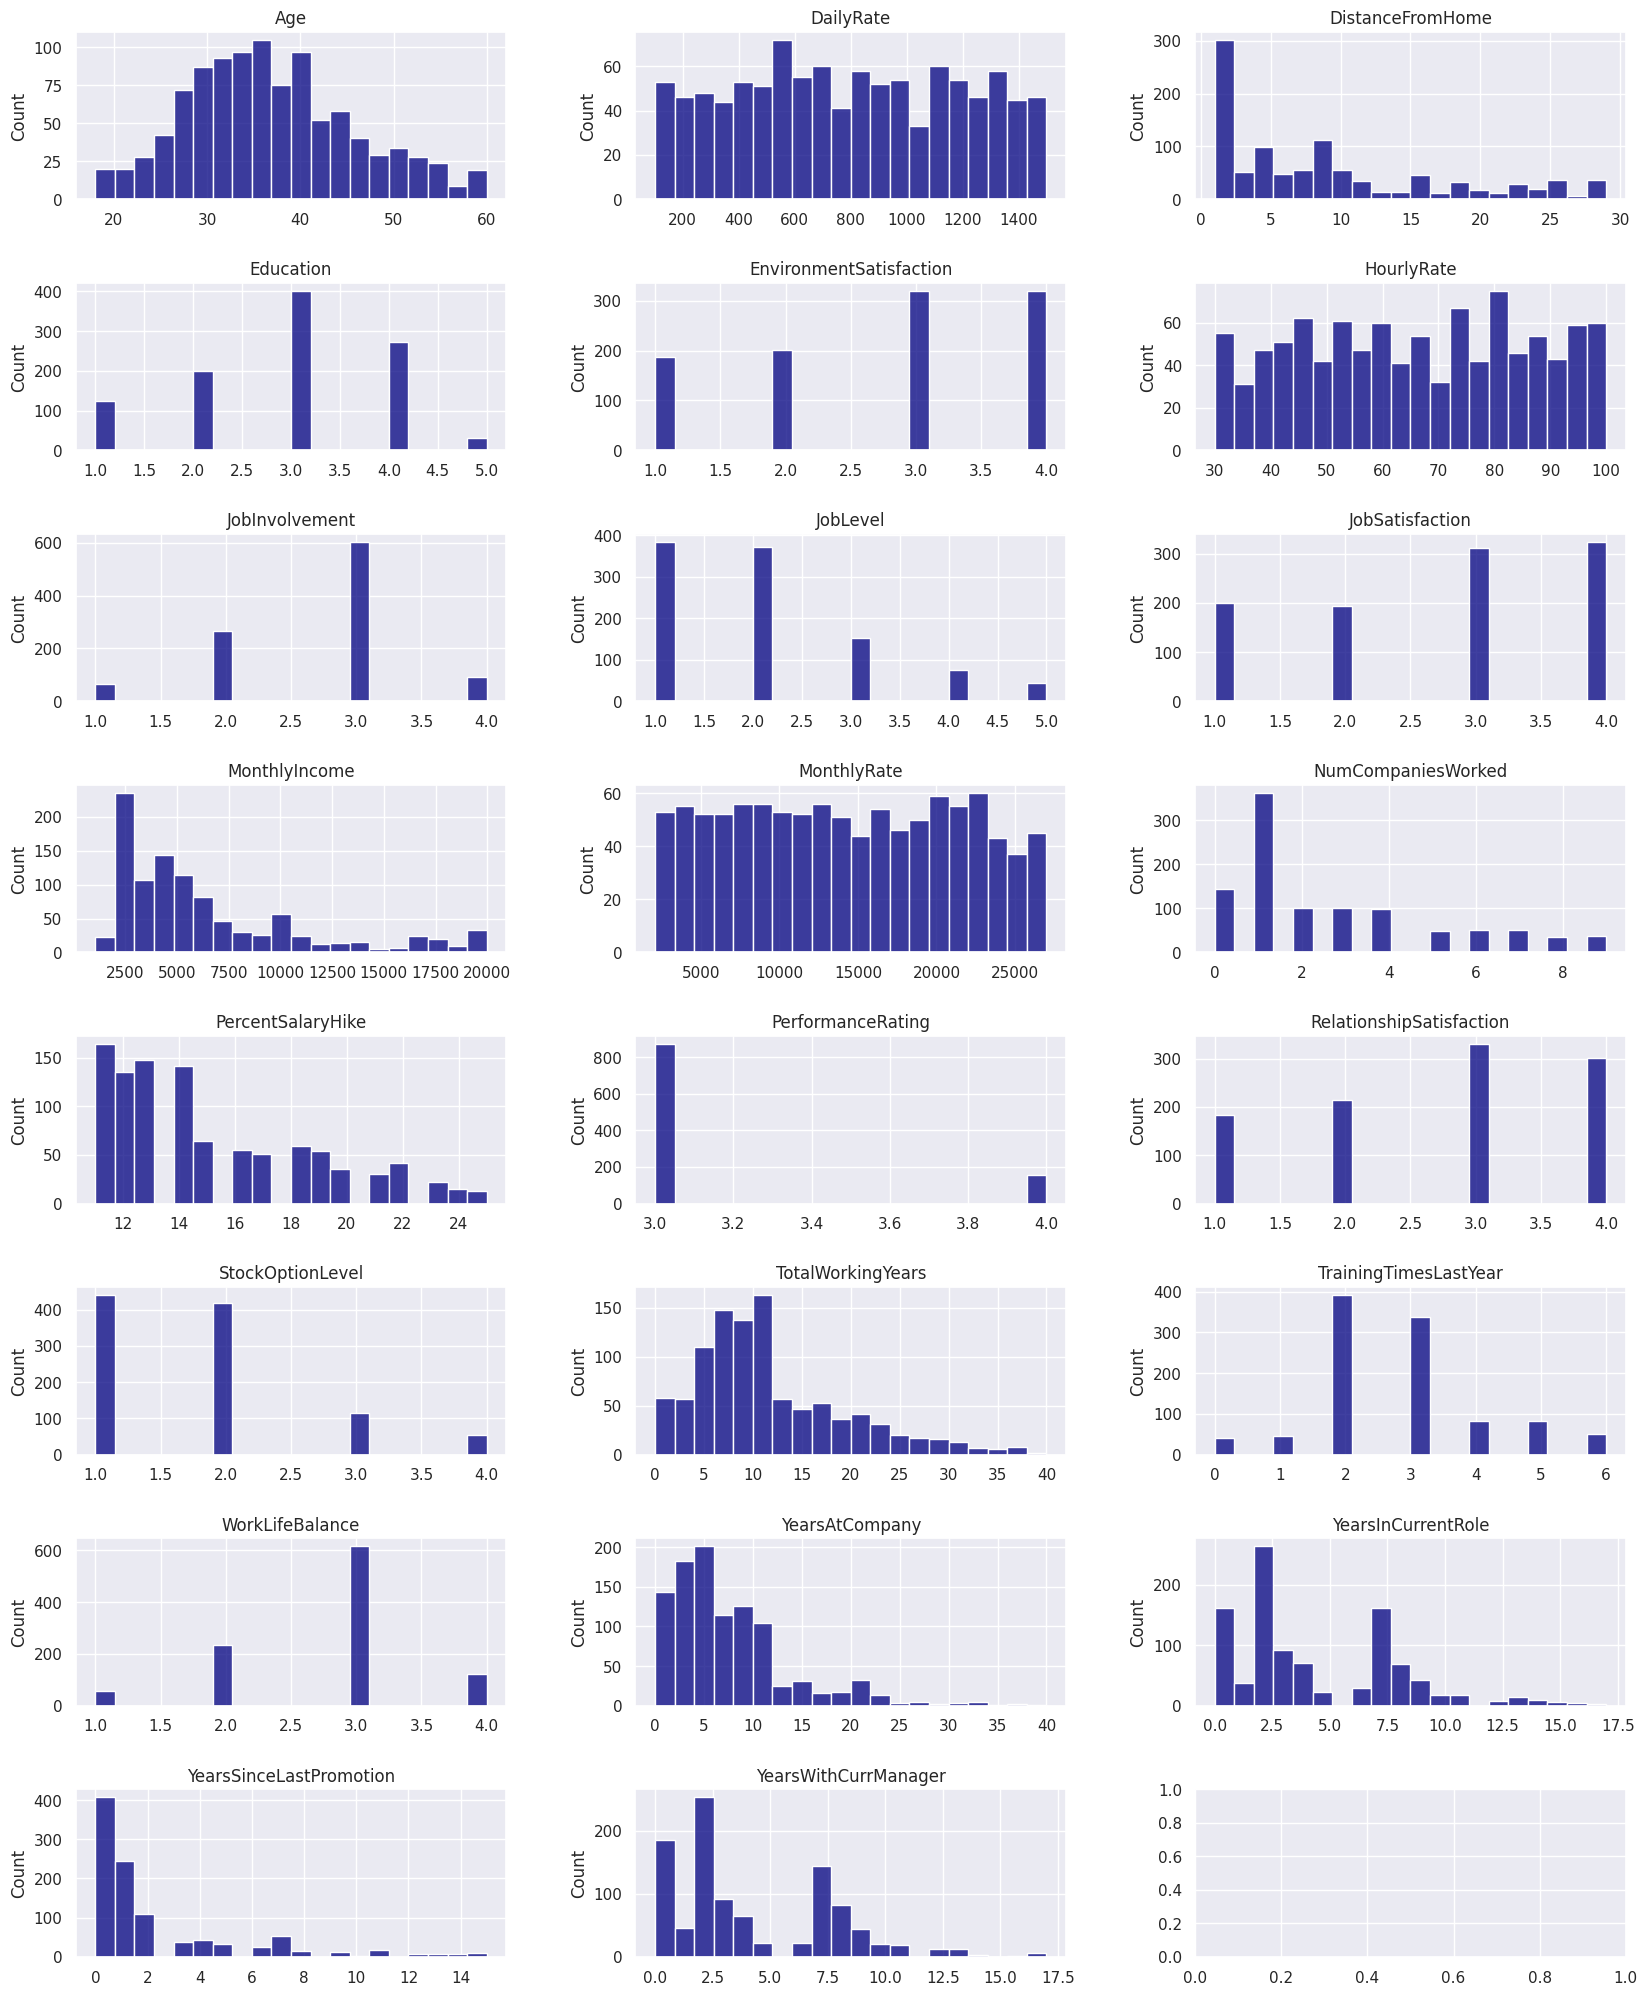

In [644]:
sns.set_theme()
fig, axes = plt.subplots(8,3, figsize=(20,25))
axes = axes.ravel()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(Xtrain.select_dtypes(include=np.number).columns.tolist(), axes):
  sns.histplot(x=Xtrain[colname],ax=ax,bins=20, color='navy')
  ax.set(title=f'{(colname)}', xlabel=None)

### Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?

Analizando las variables y sabiendo que algunas númericas se consideran categoricas se seleccionaran las variables númericas a las que se les ejecutran transformaciones como Yeo-Johnson, MinMaxScaler y transformación logaritmica.

In [645]:
numeric_variables = df.select_dtypes([np.number]).columns.to_list()
delete =['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
         'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'JobLevel']

for elem in delete:
    numeric_variables.remove(elem)
len(numeric_variables)

14

In [646]:
def make_qqplot(df, variables):

  plt.figure(figsize=(20, 20), constrained_layout=True)
  for i in range(len(variables)):
    # location in figure
    ax = plt.subplot(5, 3, i + 1)
    # variable to plot
    var = variables[i]
    # q-q plot
    stats.probplot((df[var]), dist="norm", plot=plt)
    # add variable name as title
    ax.set_title(var)
  plt.show()

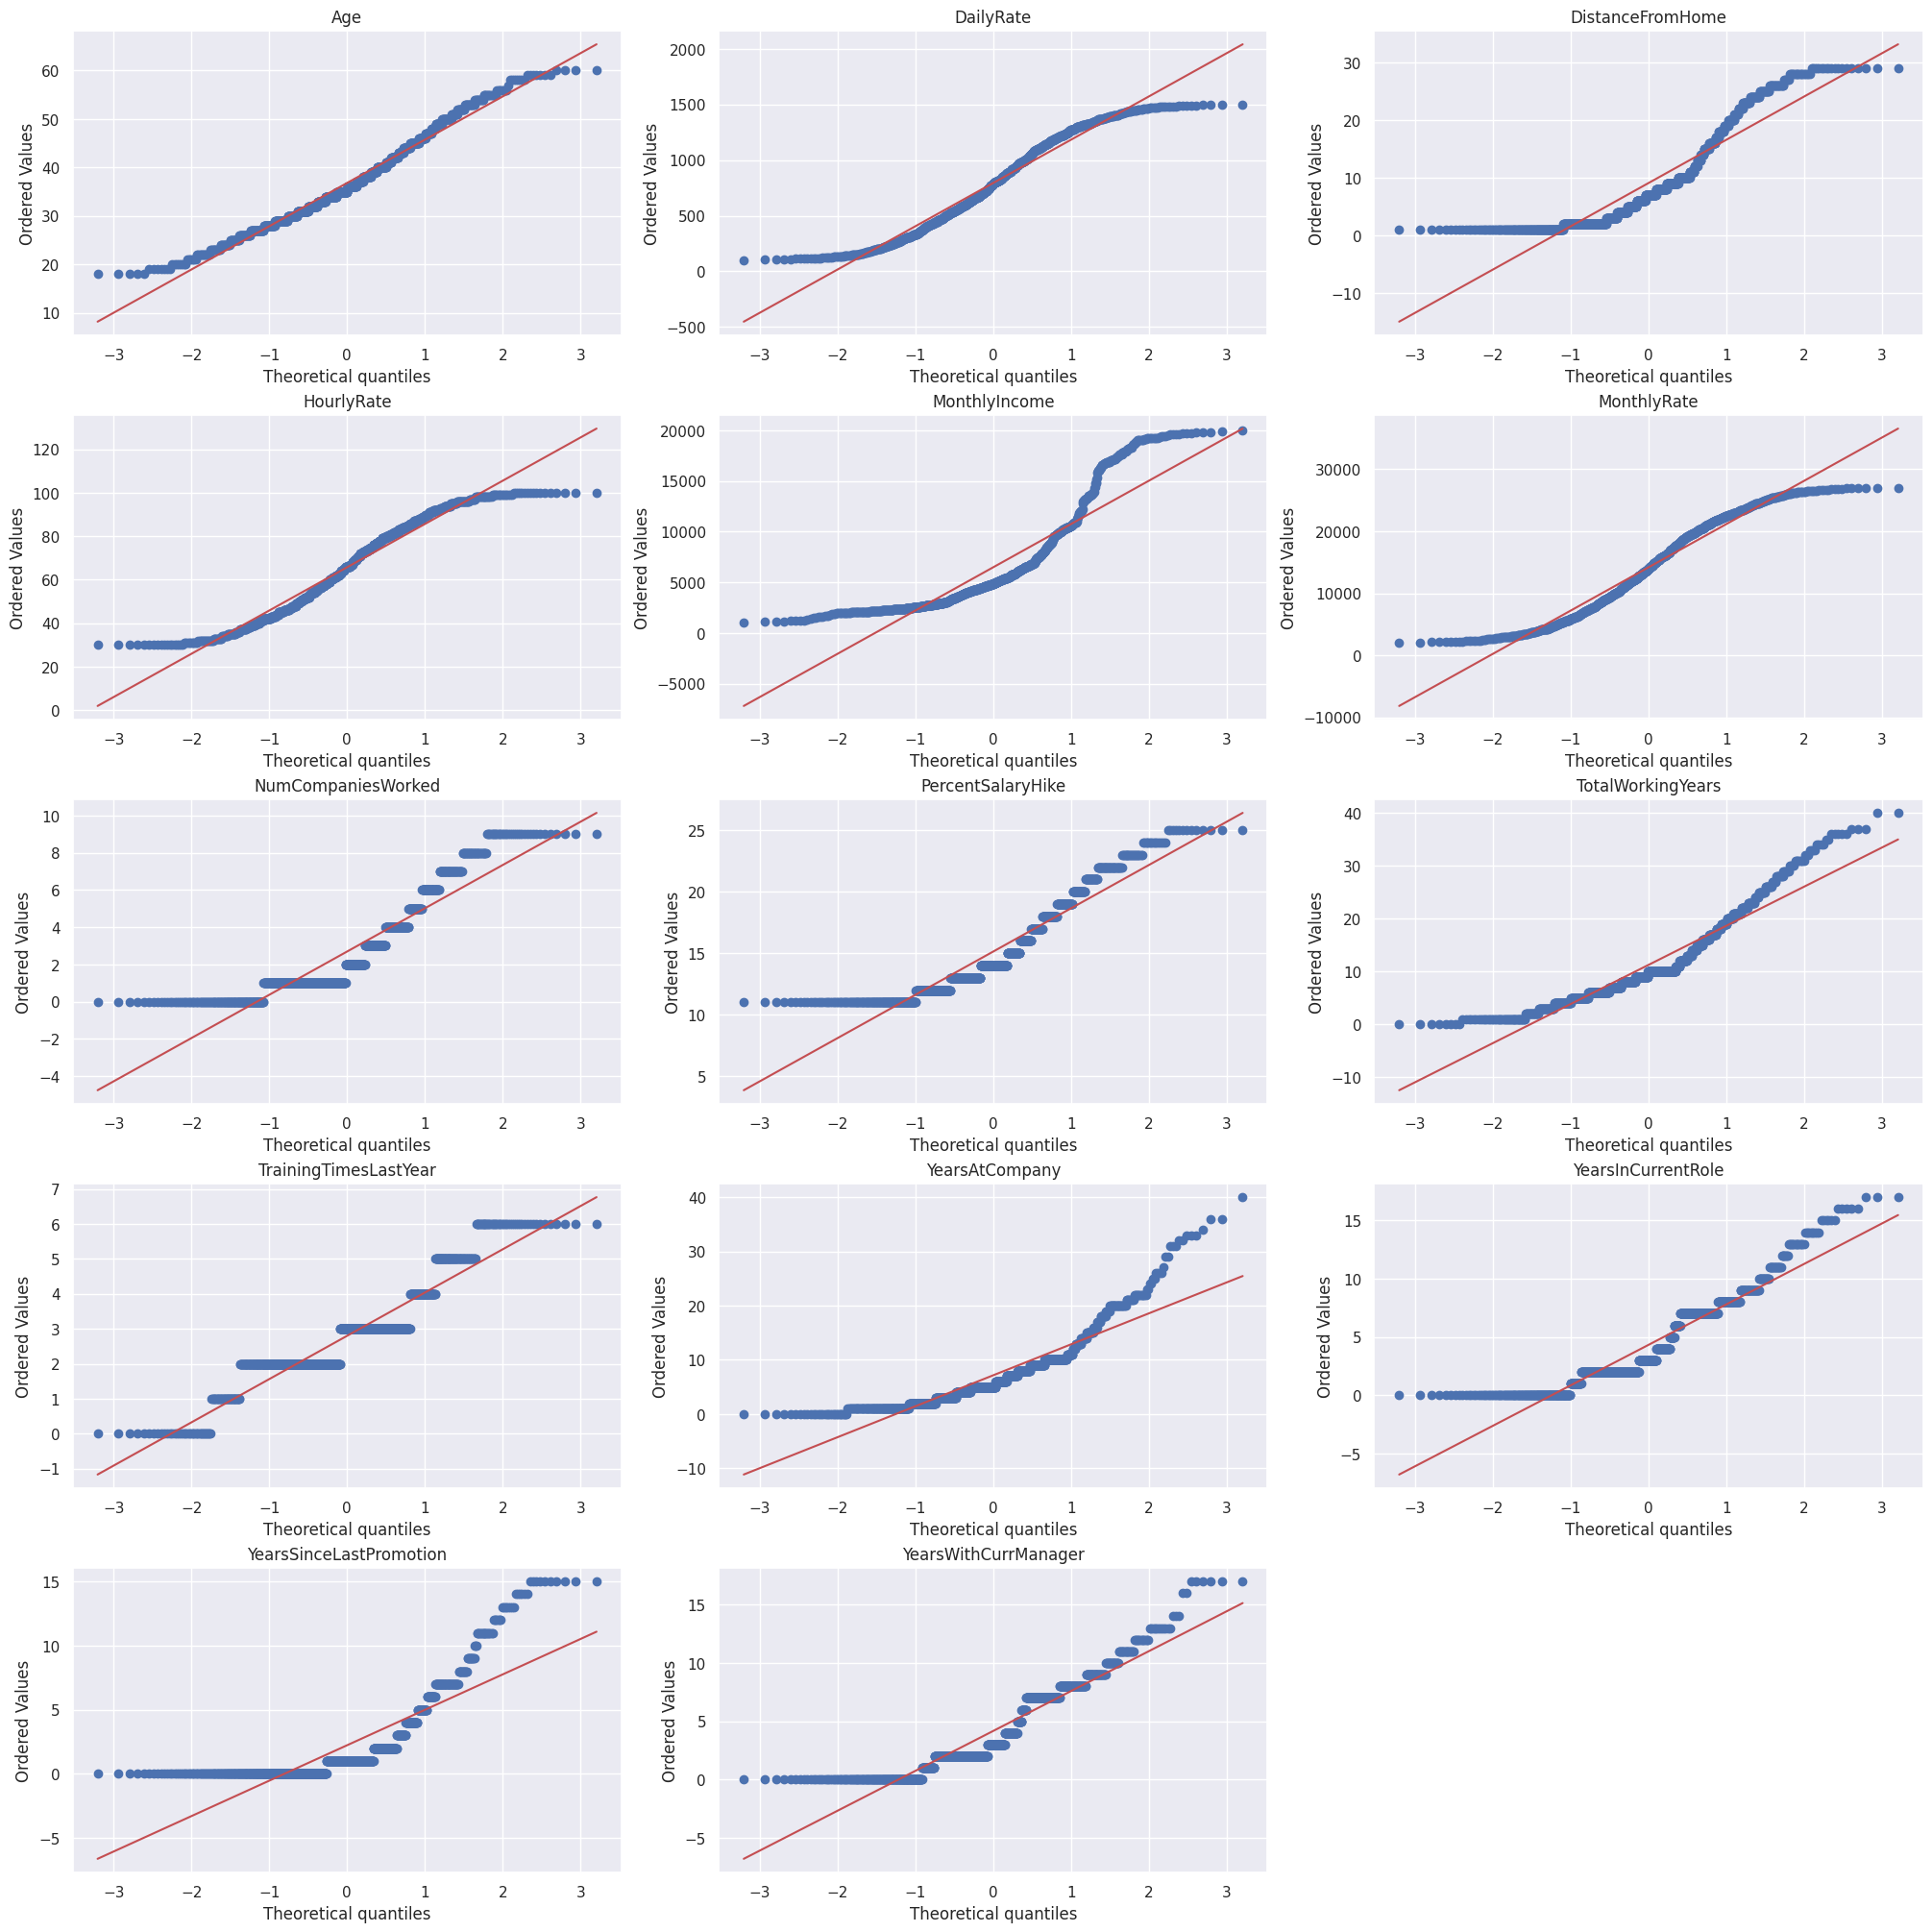

In [647]:
#Mostrando que tan cercanos estan los datos de la distribución normal
make_qqplot(Xtrain, numeric_variables)

**Ejecutando Transformación Yeo-Johnson**

In [648]:
XtrainT = Xtrain.copy()
XvalT = Xval.copy()
XtestT = Xtest.copy()
# initialize a transformer with yeo-johnson
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
# fit transformer: transformer will learn the lambdas from Xtrain
transformer.fit(Xtrain[numeric_variables])
XtrainT[numeric_variables] = transformer.transform(Xtrain[numeric_variables])
XvalT[numeric_variables] = transformer.transform(Xval[numeric_variables])
XtestT[numeric_variables] = transformer.transform(Xtest[numeric_variables])

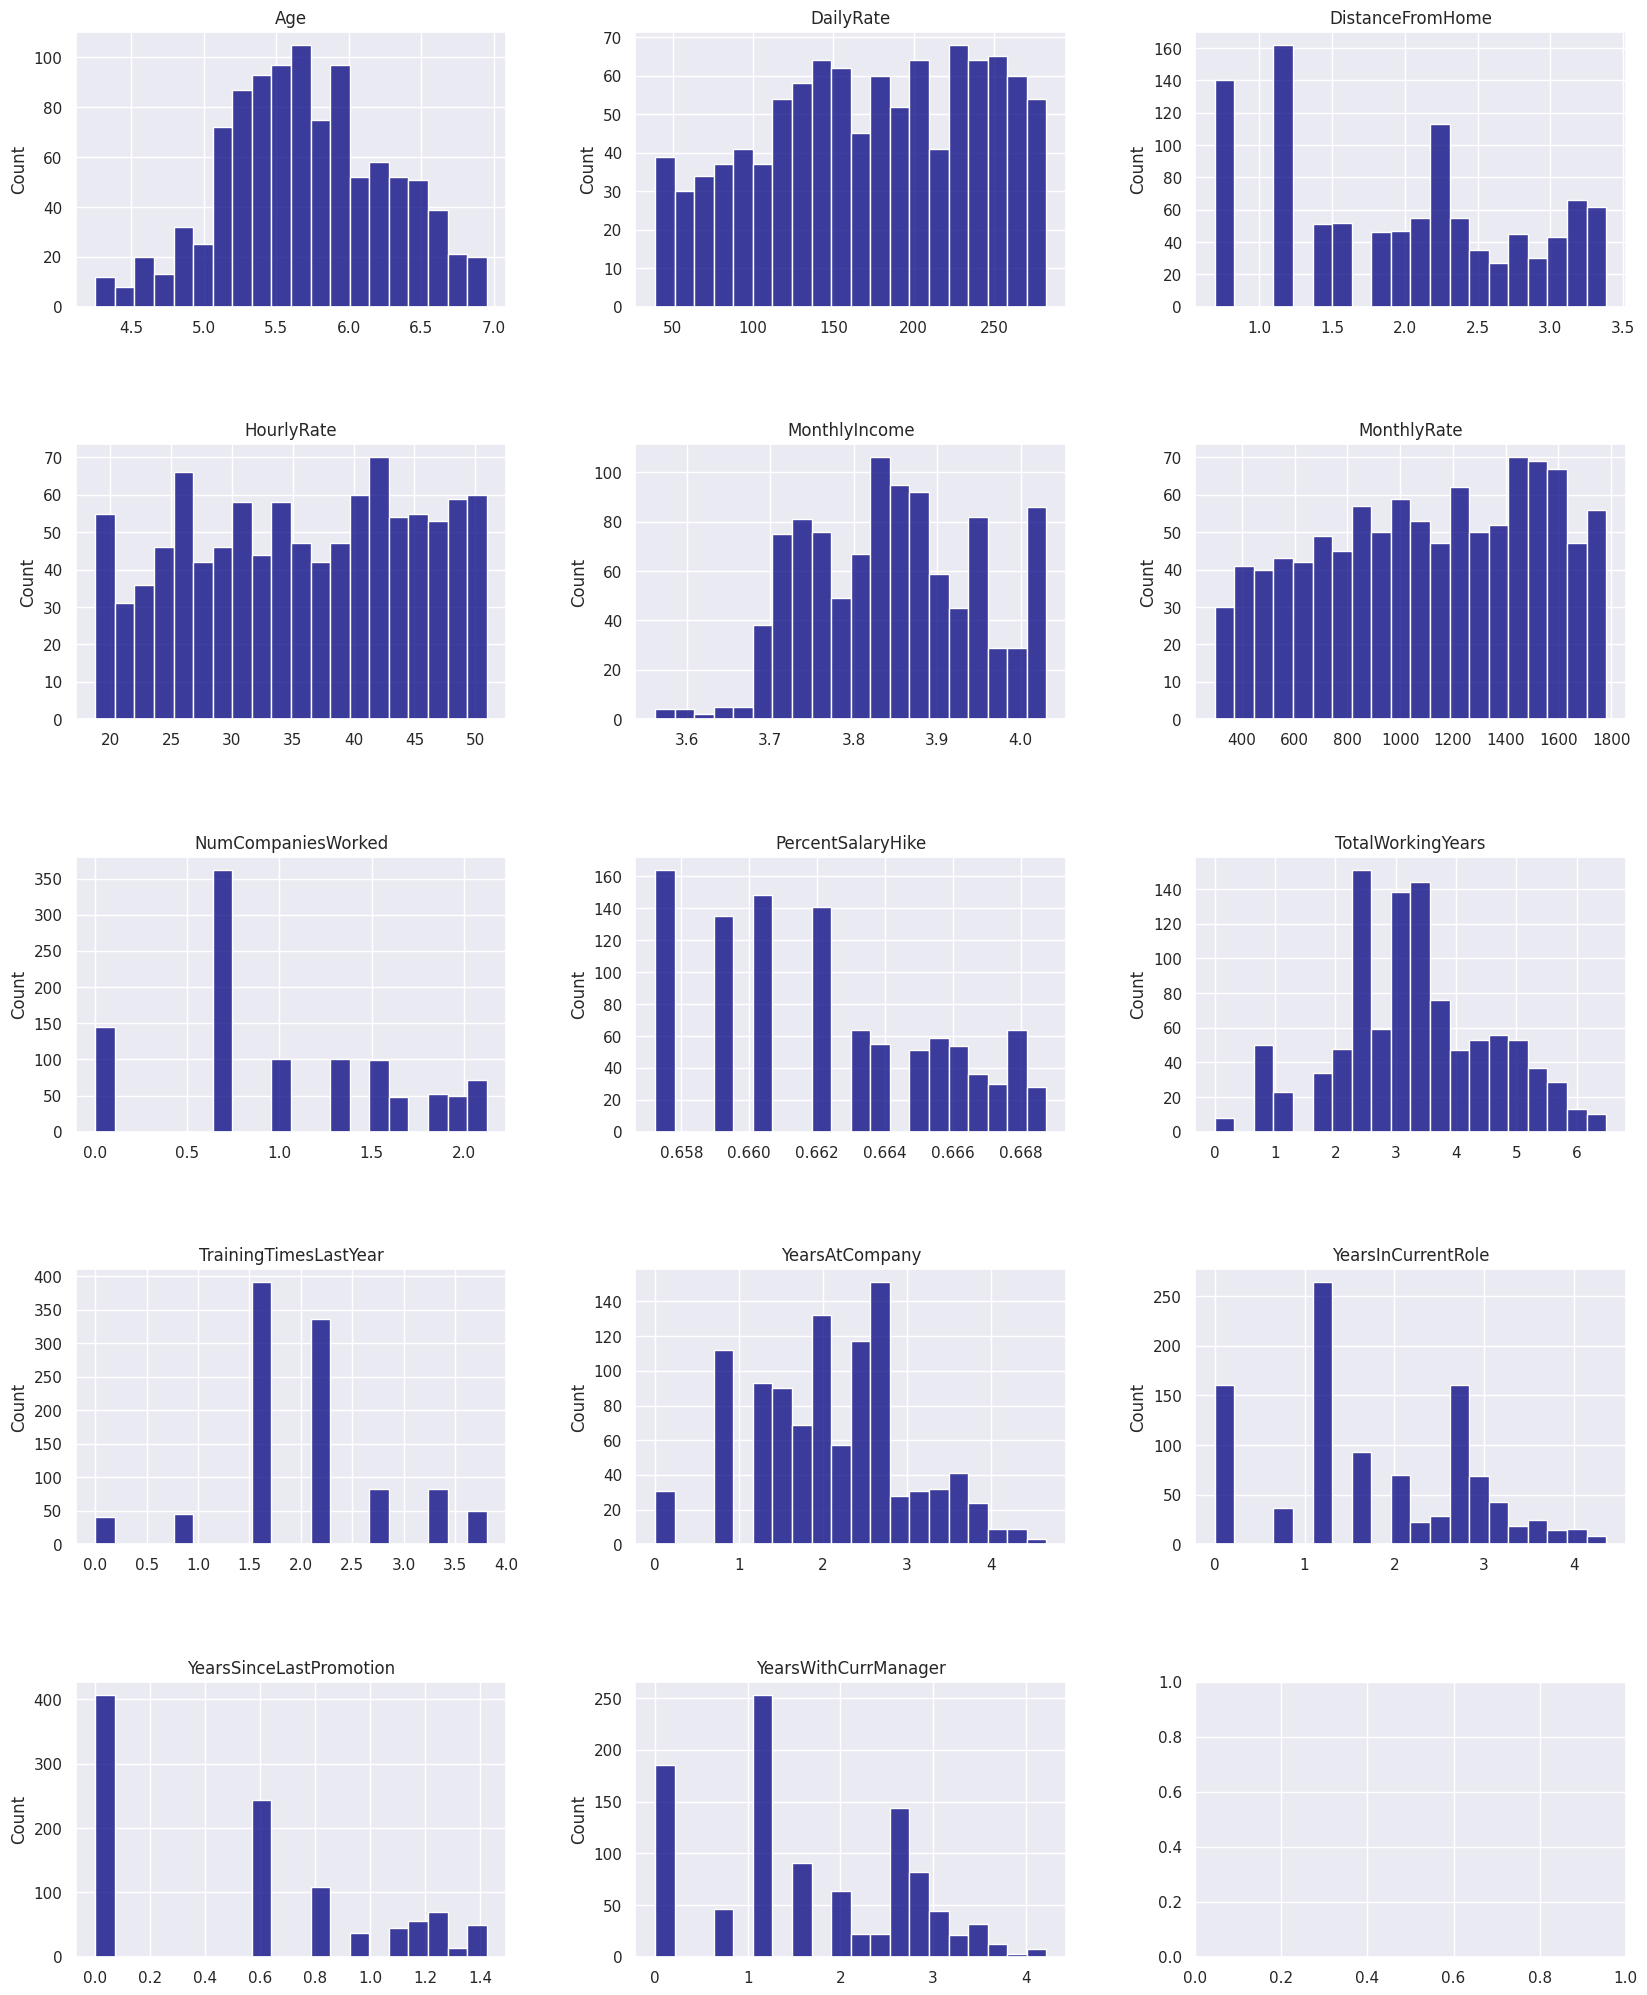

In [649]:
sns.set_theme()
fig, axes = plt.subplots(5,3, figsize=(20,25))
axes = axes.ravel()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(numeric_variables, axes):
  sns.histplot(x=XtrainT[colname],ax=ax,bins=20, color='navy')
  ax.set(title=f'{(colname)}', xlabel=None)

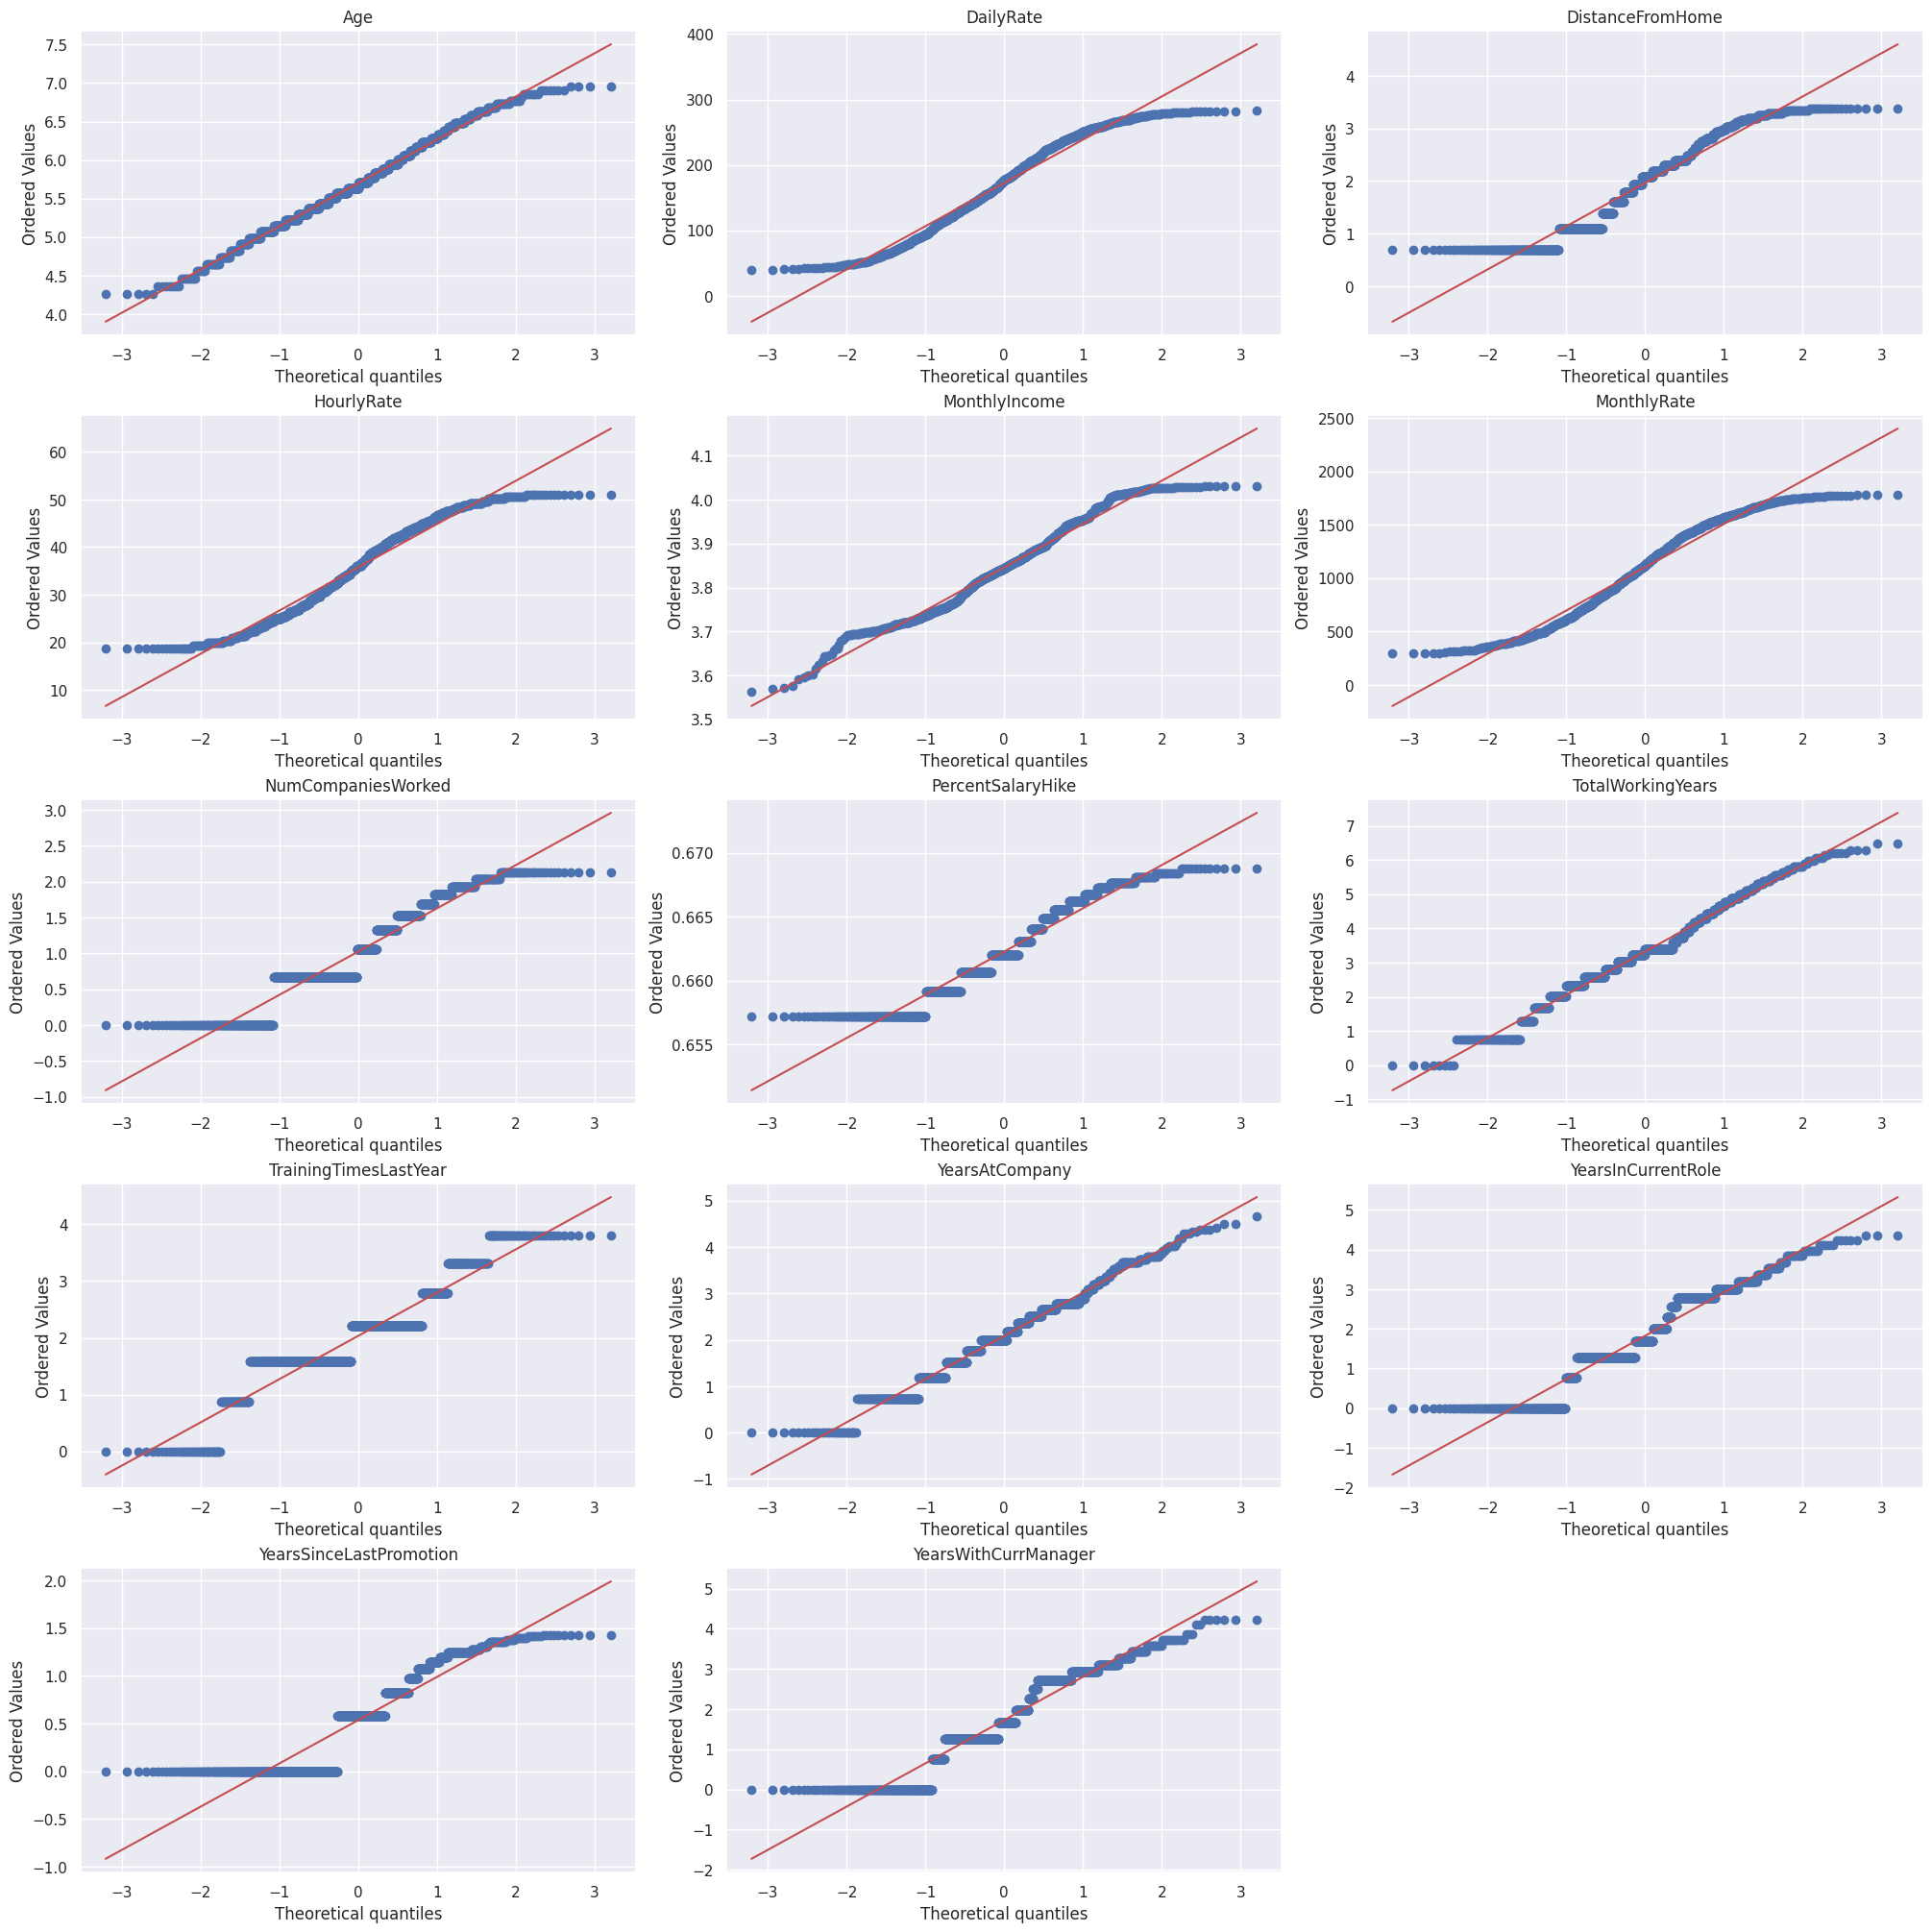

In [650]:
make_qqplot(XtrainT, numeric_variables)

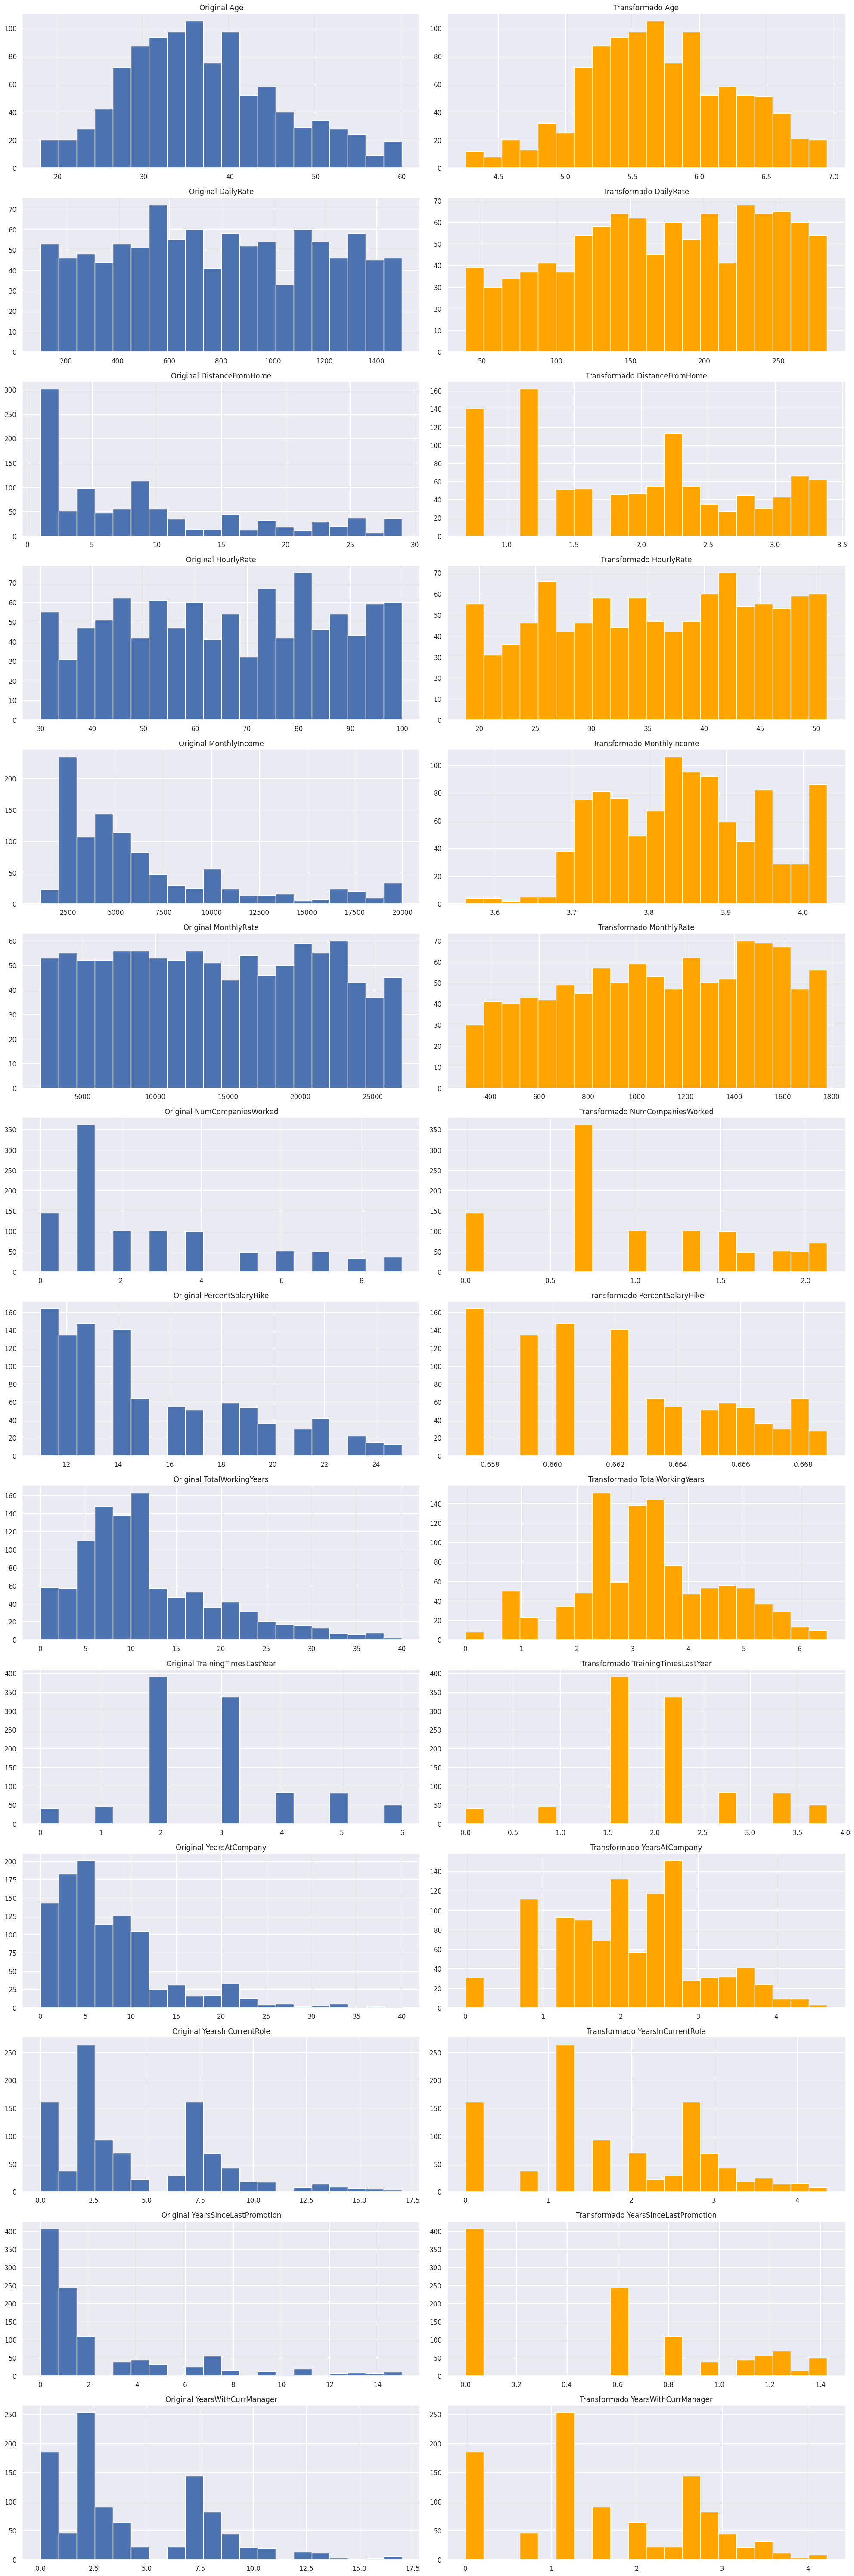

In [651]:
# Configuramos el plot de 14 filas por 2 columnas
fig, axs = plt.subplots(14, 2, figsize=(20, 60))

# Nombres de las columnas para iterar
columns = numeric_variables

# Creamos los histogramas
for i, column in enumerate(columns):
    axs[i, 0].hist(Xtrain[column], bins=20, label='Original')
    axs[i, 0].set_title(f'Original {column}')

    axs[i, 1].hist(XtrainT[column], bins=20, color='orange', label='Transformado')
    axs[i, 1].set_title(f'Transformado {column}')

plt.tight_layout()
plt.show()

In [652]:
scaler = MinMaxScaler()

scaler.fit(Xtrain[numeric_variables])

XtrainT[numeric_variables] = scaler.transform(Xtrain[numeric_variables])
XvalT[numeric_variables] = scaler.transform(Xval[numeric_variables])
XtestT[numeric_variables] = scaler.transform(Xtest[numeric_variables])

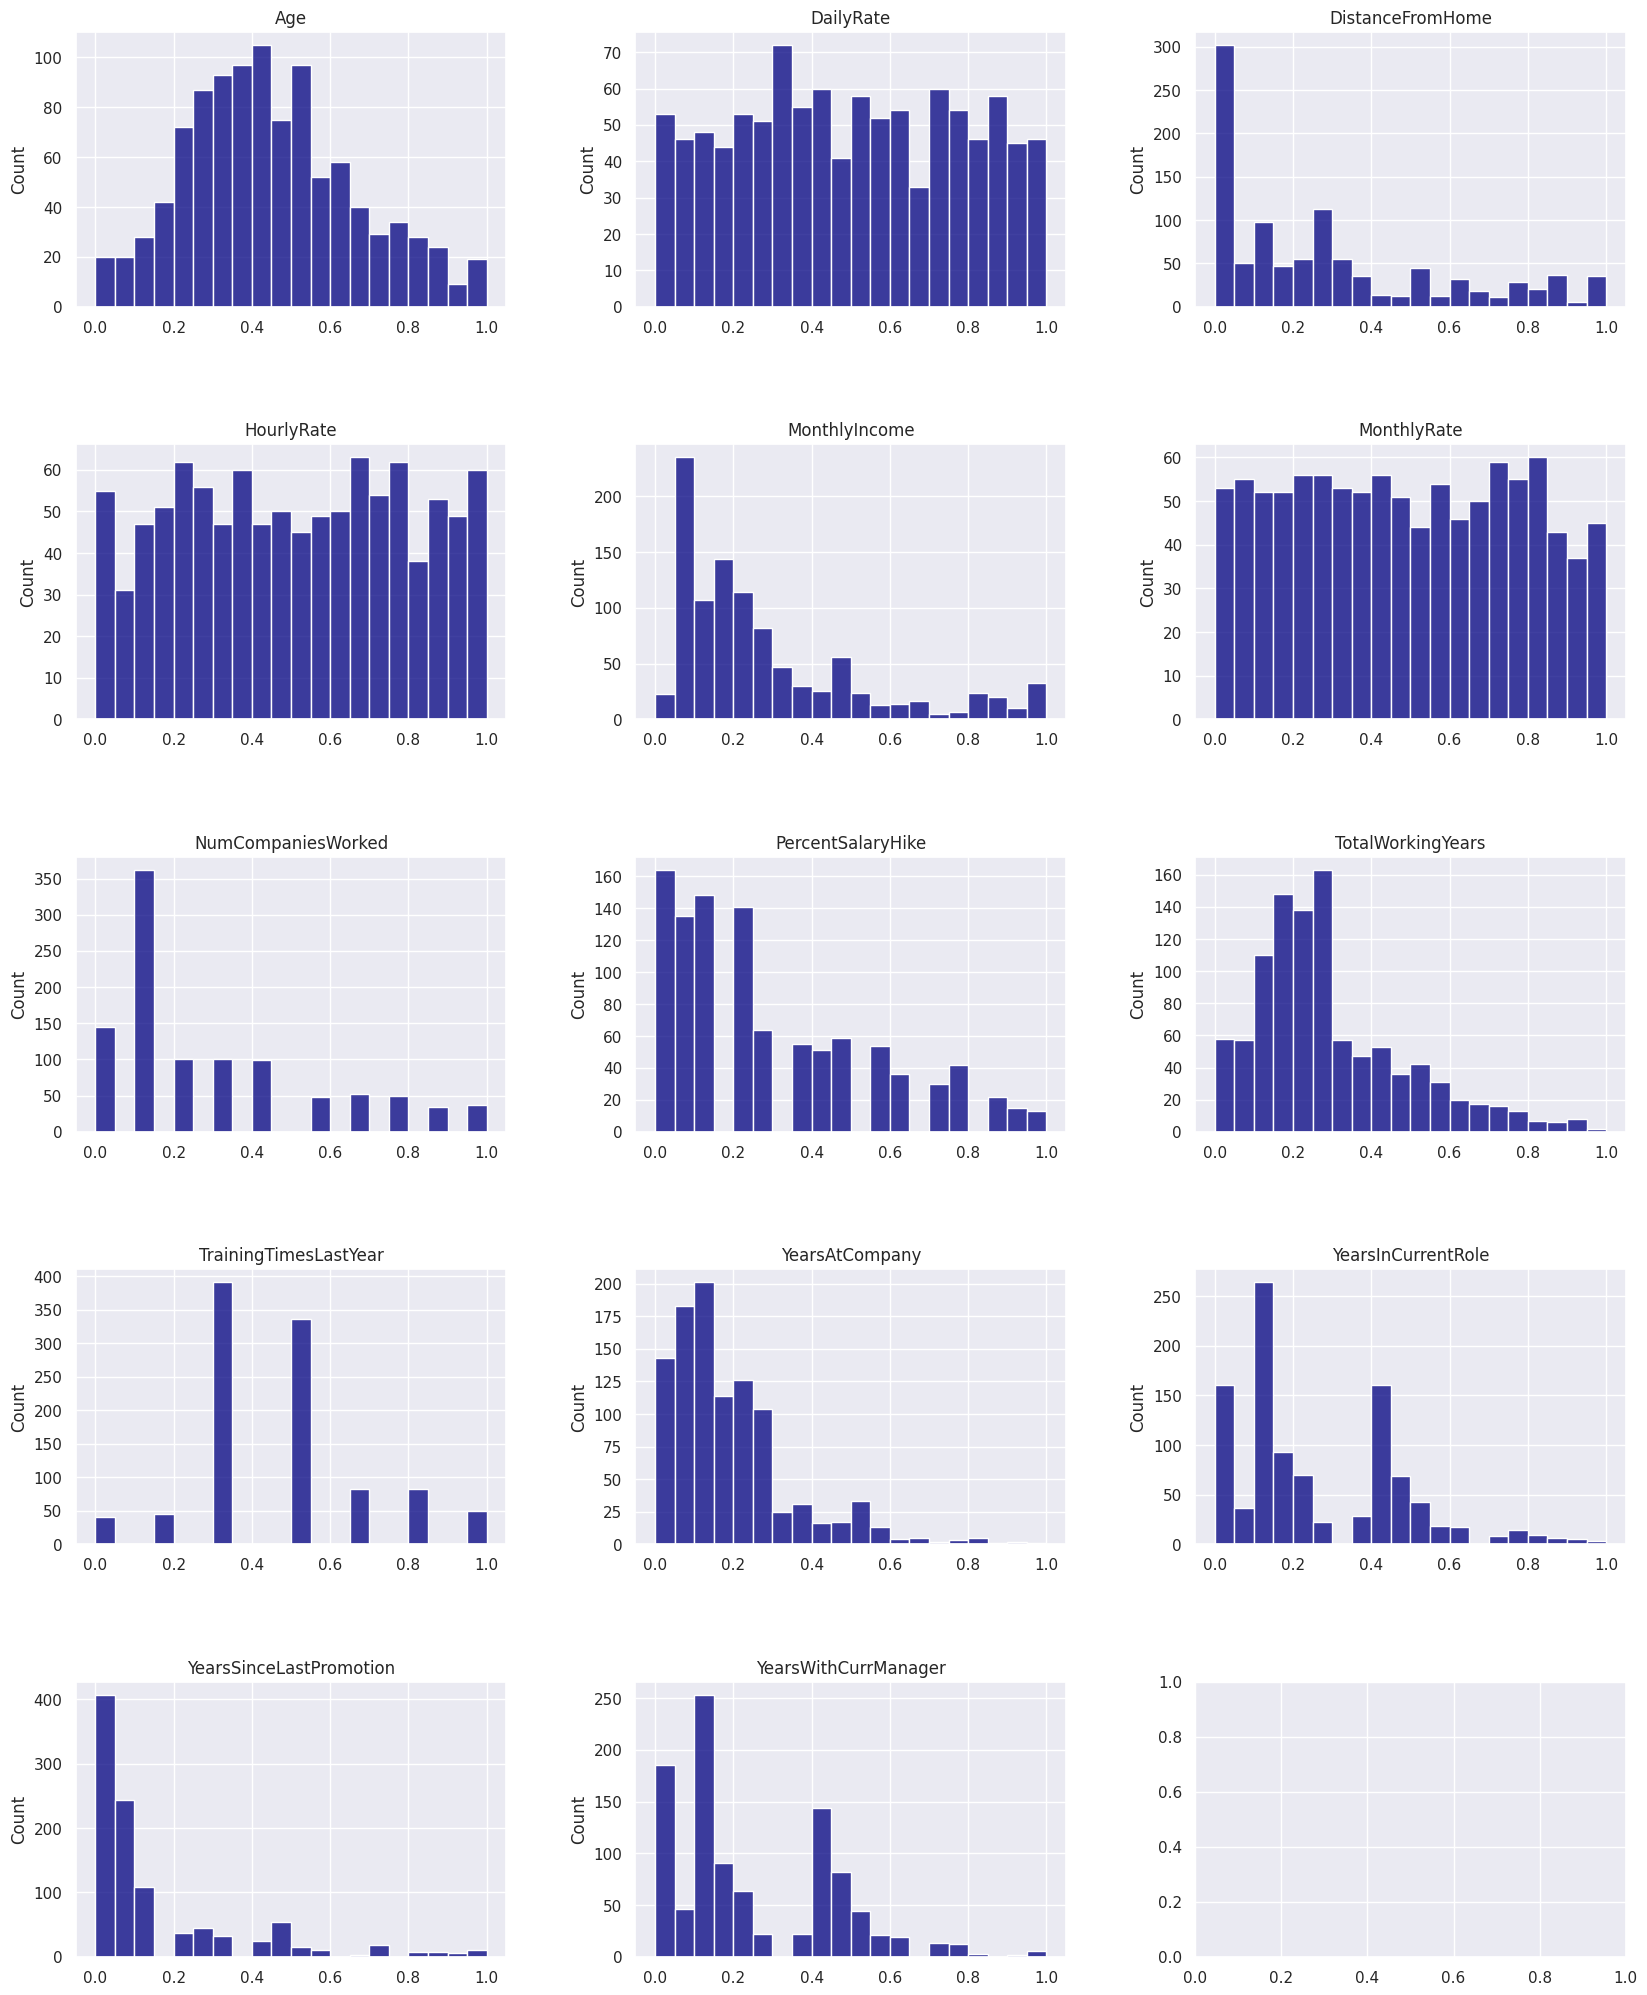

In [653]:
sns.set_theme()
fig, axes = plt.subplots(5,3, figsize=(20,25))
axes = axes.ravel()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
for colname, ax in zip(numeric_variables, axes):
  sns.histplot(x=XtrainT[colname],ax=ax,bins=20, color='navy')
  ax.set(title=f'{(colname)}', xlabel=None)

## 5) Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.

In [654]:
def make_count(df, lista, fila, columna):
    # Histogramas de Datos Numericos para XTrain.
    sns.set_theme()
    fig, axes = plt.subplots(fila,columna, figsize=(5,5))
    axes = axes.ravel()
    for colname, ax in zip(lista, axes):
        sns.countplot(data=df, x=colname, ax=ax, color='navy')
        ax.set(title=f'{(colname)}', xlabel=None)
    fig.tight_layout()

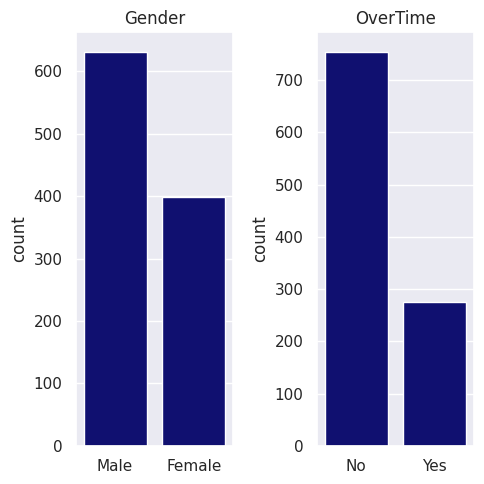

In [655]:
make_count(XtrainT, ['Gender', 'OverTime'],1,2)

<Axes: xlabel='Attrition', ylabel='count'>

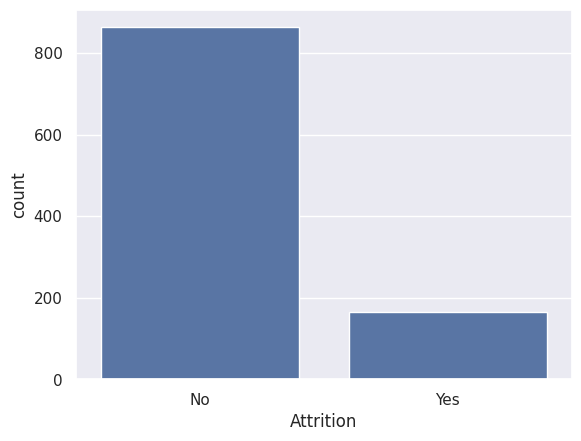

In [656]:

sns.countplot(x=ytrain)

In [657]:
# Inicializar LabelEncoders para cada variable binaria
le_attrition = LabelEncoder()
le_gender = LabelEncoder()
le_overtime = LabelEncoder()


# Aplicar LabelEncoder a las variables binarias en el conjunto de entrenamiento
ytrainT = le_attrition.fit_transform(ytrain)
XtrainT['Gender'] = le_gender.fit_transform(Xtrain['Gender'])
XtrainT['OverTime'] = le_overtime.fit_transform(Xtrain['OverTime'])

# Transformar las variables binarias en los conjuntos de validación y prueba
yvalT = le_attrition.transform(yval)
ytestT = le_attrition.transform(ytest)
XvalT['Gender'] = le_gender.transform(Xval['Gender'])
XvalT['OverTime'] = le_overtime.transform(Xval['OverTime'])
XtestT['Gender'] = le_gender.transform(Xtest['Gender'])
XtestT['OverTime'] = le_overtime.transform(Xtest['OverTime'])

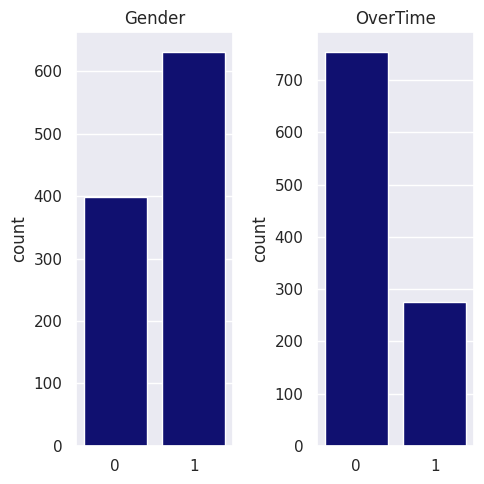

In [658]:
make_count(XtrainT, ['Gender', 'OverTime'],1,2)

<Axes: ylabel='count'>

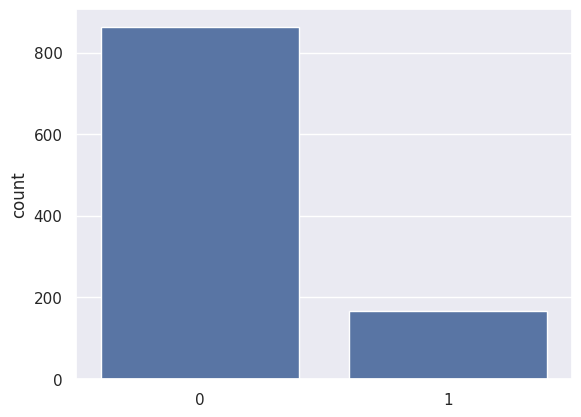

In [659]:
sns.countplot(x=ytrainT)

Analizando estas gráficas podemos observar que las clases son desbalanceadas como anteriormente se mencionó para el stratify se presenta una proporción de 83% que no dejan la empresa y un 17% que abandonan la empresa

## 6) Realiza una inspección de las variables ordinales y determina qué transformaciones aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.

<Axes: xlabel='BusinessTravel', ylabel='count'>

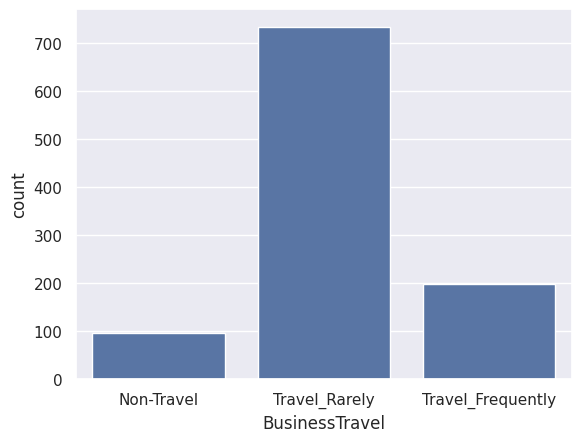

In [660]:
sns.countplot(x = XtrainT['BusinessTravel'])

<Axes: xlabel='BusinessTravel', ylabel='count'>

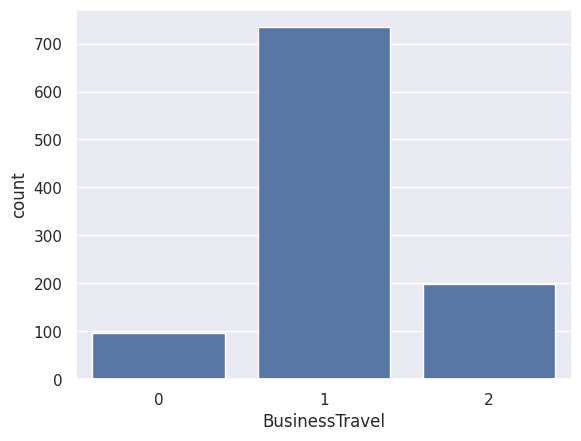

In [661]:
# Cambiar BussinessTravel a Ordinal númerica
'''
Non_Travel = 0
Travel_Rarely = 1
Travel_Frequently = 2
'''
dict = {"Non-Travel" : 0, "Travel_Rarely" : 1, "Travel_Frequently": 2}
XtrainT = XtrainT.replace({"BusinessTravel": dict})
XvalT = XvalT.replace({"BusinessTravel": dict})
XtestT = XtestT.replace({"BusinessTravel": dict})

sns.countplot(x = XtrainT['BusinessTravel'])

## 7) Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes incluir la variable “Attrition”.

<Axes: >

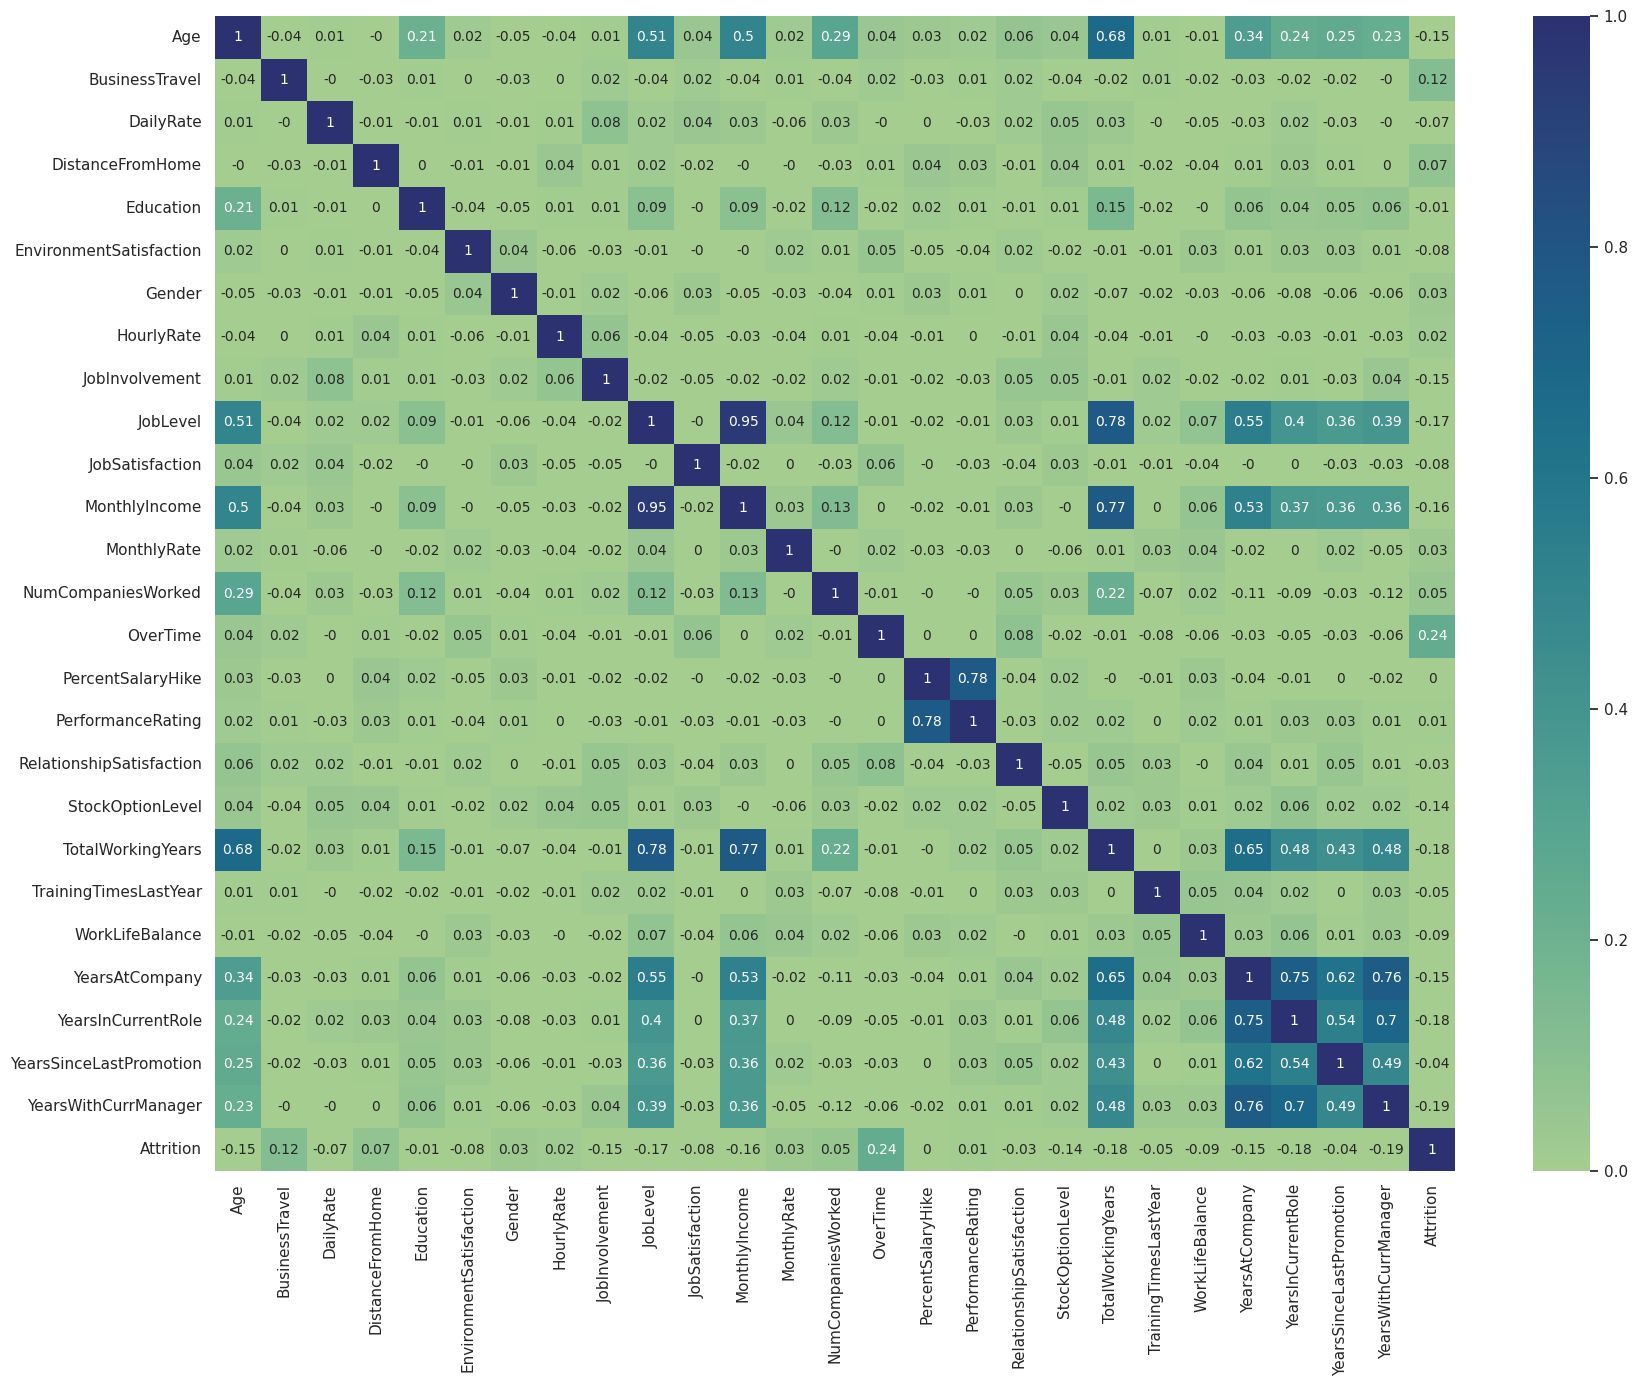

In [662]:
XtrainT_attrition = XtrainT.copy()
XtrainT_attrition['Attrition'] = ytrainT
plt.figure(figsize = (20, 15))
sns.heatmap(round(XtrainT_attrition.corr(numeric_only=True),2), annot = True, vmin=0, vmax=1, annot_kws={"size":10}, cmap="crest")

a) Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres dentro de la matriz.



*   MonthlyIncome - JobLevel 0.95
*   TotalWorkingYears - JobLevel 0.78
*   YearInCompany - YearsinCurrentRole 0.75
*   MonthlyIncome - TotalWorkingYears 0.77
*   YearsWithCompany - YearsWithCurrManager 0.76
*   JobLevel - Age 0.51


b) Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres dentro de la matriz.

En base a nuestros datos tenemos mucha información que nos dice que la mayorpia de empleados se queda pero poca información sobre los empleados que se van, teniendo clases desbalanceadas tiene sentido que no exista alguna correlación negativa fuerte

## 8) Aplica la transformación get_dummies() de Pandas a las variables nominales, evitando el filtrado de información y usando el argumento “drop_first” para generar “k-1” variables “dummies”, de las “k” que cada variable.

In [663]:
nom_var = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Aplicar get_dummies() al conjunto de entrenamiento y guardar el resultado
XtrainT = pd.get_dummies(XtrainT, columns=nom_var, drop_first=True)
XvalT   = pd.get_dummies(XvalT, columns=nom_var, drop_first=True)
XtestT  = pd.get_dummies(XtestT, columns=nom_var, drop_first=True)

In [664]:
XtrainT.head().T

,1293,774,580,591,1165
Age,0.595238,0.880952,0.404762,0.357143,0.619048
BusinessTravel,0.000000,0.000000,1.000000,1.000000,2.000000
DailyRate,0.172513,0.244810,0.201861,0.011453,0.357910
DistanceFromHome,0.285714,0.035714,0.250000,0.535714,0.000000
Education,3.000000,1.000000,4.000000,3.000000,5.000000
EnvironmentSatisfaction,1.000000,3.000000,1.000000,1.000000,1.000000
Gender,1.000000,1.000000,0.000000,0.000000,1.000000
HourlyRate,0.314286,0.142857,0.600000,0.557143,0.100000
JobInvolvement,3.000000,2.000000,3.000000,3.000000,3.000000
JobLevel,1.000000,4.000000,1.000000,2.000000,2.000000


# PARTE 2: Análisis exploratorio entre factores

## 10) Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. A a manera de ejemplos, veamos solo algunas de dichas relaciones gráficamente y que pueden aportar información al problema que enfrentamos.

### a) Las variables “Age” y “Attrition”.





<Axes: xlabel='Attrition', ylabel='count'>

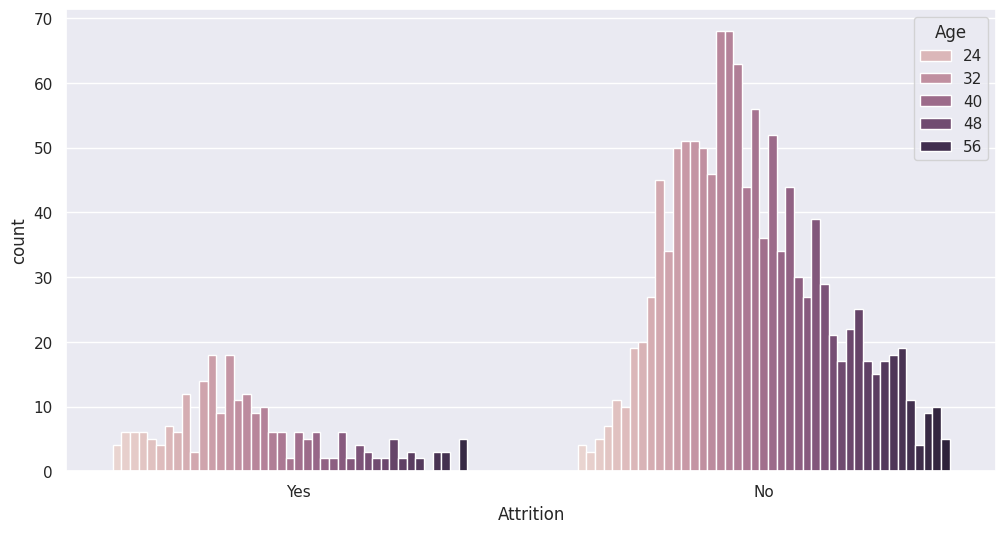

In [665]:
plt.figure(figsize=(12,6))
sns.countplot(data= df, x= "Attrition", hue='Age')

<Axes: title={'center': 'Histogramas'}, xlabel='Age', ylabel='Count'>

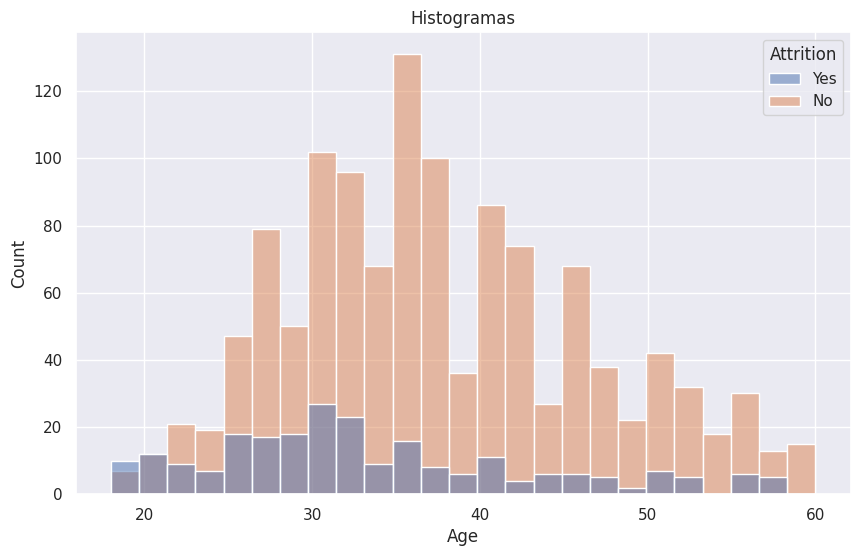

In [666]:
plt.figure(figsize=(10,6))
plt.title("Histogramas")
sns.histplot(data=df, x='Age', hue='Attrition', bins = 25)

### b) Las variables “Department” y “Attrition”.

<Axes: xlabel='Attrition', ylabel='count'>

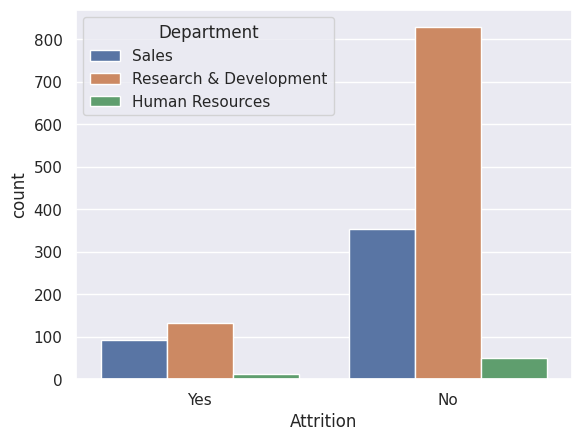

In [667]:
sns.countplot(data= df, x= "Attrition", hue='Department')

### c) Las variables “Gender” y “Attrition”.

<Axes: xlabel='Attrition', ylabel='count'>

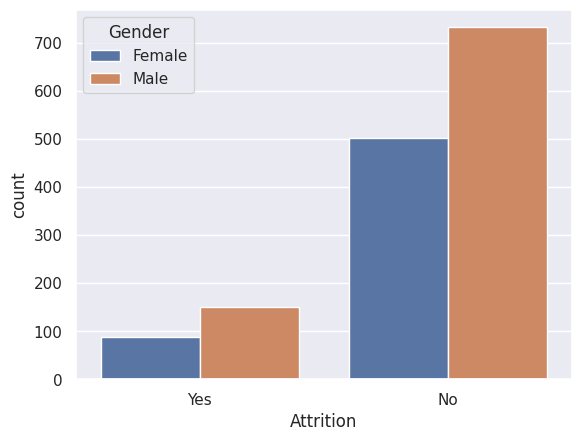

In [668]:
sns.countplot(data = df, x= "Attrition", hue='Gender')

### d) Incluye alguna otra relación o relaciones que consideres relevantes.

<Axes: xlabel='OverTime', ylabel='count'>

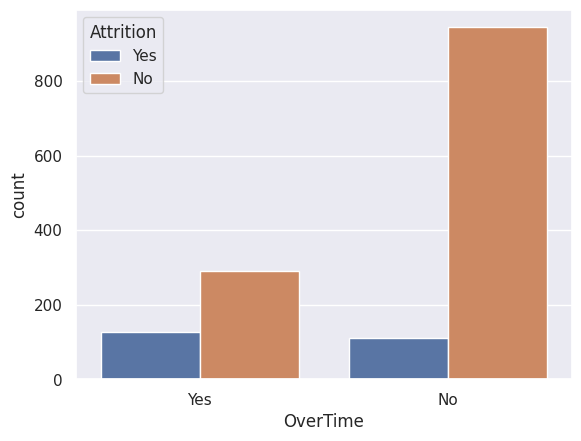

In [669]:
sns.countplot(data = df, x= "OverTime", hue='Attrition')

<Axes: xlabel='BusinessTravel', ylabel='count'>

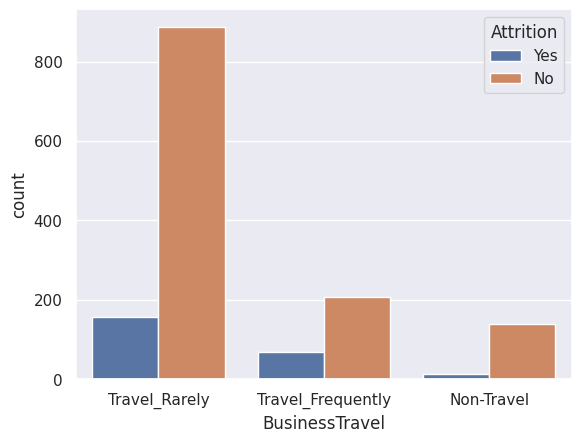

In [670]:
sns.countplot(data = df, x= "BusinessTravel", hue='Attrition')

### e) Con base a los gráficos obtenidos incluye tus conclusiones al respecto.

**Age y Attrition**

De este gráfico podemos identifcar una relación normal más significativa en los empleados que no han dejado la empresa lo que nos permite decir que la empresa mantiene una entrada constante de personal joven además de que matiene a la mayoría de sus empleados, por parte de los empleados que abandonas la empresa se puede observar que la mayoría son más jovenes y son pocos los que abandonan a mucha edad.

**Department y Attrition**

Podemos notar aquí la manera en como se encuentra una mayor concentración de empleados en las áreas de Investigación y desarrollo pues son justamente las áreas en las que se centra la empresa, al igual manera en una proporción semejante los empleados que más dejan la empresa corresponden a este departamento lo que nos hace notar una relación proporcional.

**Genero y Attrition**

En este gráfico es posible notar que se tiene una proporción igual en hombres y mujeres respecto a los que se quedan como los que se van. Existiendo una mayor proporción de hombres que de mujeres en general.

**OverTime y Attrition**
En esta varible se buscaba analizar si el tiempo extra representaba un  factor de decisión al momento de decidir abandonar un trabajo es poca la relación y peso que tiene este factor



# PARTE 3: Modelado

In [671]:
Log_reg = LogisticRegression(max_iter=300, random_state=42, C=10.0)
Log_reg.fit(XtrainT,ytrainT)


LogisticRegression(C=10.0, max_iter=300, random_state=42)

## a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [672]:
# Use score method to get accuracy of model
score_train = Log_reg.score(XtrainT, ytrainT)
print("Accuracy:", score_train)

Accuracy: 0.8843537414965986


In [673]:
score_val = Log_reg.score(XvalT, yvalT)
print("Accuracy:", score_val)

Accuracy: 0.8954545454545455


## b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

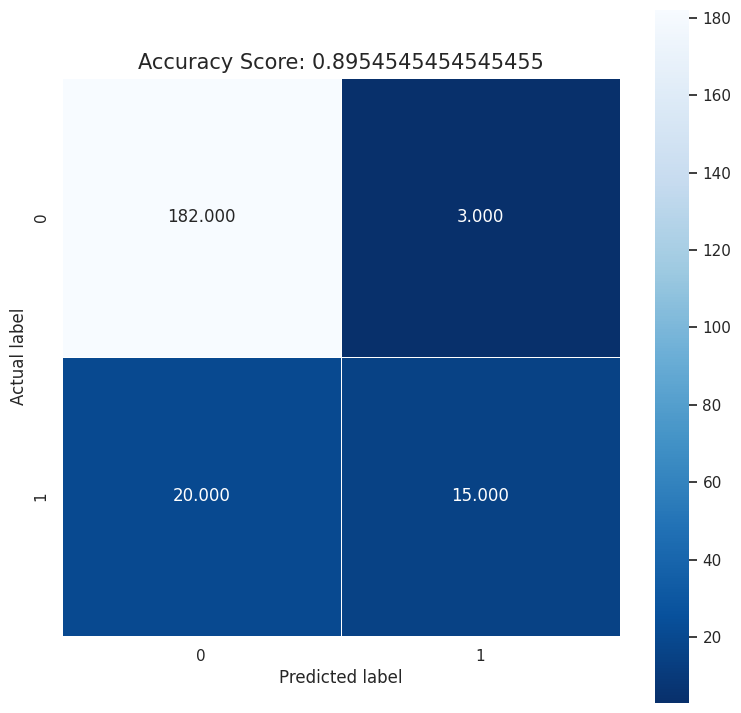

In [674]:
predictions = Log_reg.predict(XvalT)
predictions_train = Log_reg.predict(XtrainT)
cm = metrics.confusion_matrix(yvalT, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_val)
plt.title(all_sample_title, size = 15);

In [675]:
report = classification_report(ytrainT, predictions_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       863
           1       0.74      0.44      0.55       166

    accuracy                           0.88      1029
   macro avg       0.82      0.70      0.74      1029
weighted avg       0.87      0.88      0.87      1029



In [676]:
report = classification_report(yvalT, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       185
           1       0.83      0.43      0.57        35

    accuracy                           0.90       220
   macro avg       0.87      0.71      0.75       220
weighted avg       0.89      0.90      0.88       220



## c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.

Para poder determinar el underfitting o overfitting lo realice mediante el anális del accuracy en este podemos darnos cuenta que del entrenamiento a la validación hay un leve mejora por lo que el modelo se encuentra equilibrado no presenta un overfitting porque no lo esta ejecutando solo bien en el entranmiento y no es un underfitting por ambos valores son altos

## d) ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.

En base a análisis anteriores sobre la distribución de los datos y ahora con la matriz de confusión es posible observar que si es un problema desbalanceado se tienen una mayor proporción de registros sobre empleados que no dejan la empresa y muy pocos registros que si deciden abandonar, por lo tanto este modelo tiene un mejor entrenamiento para predecir los empleados que se quedan y para lograr predecir si el empleado deja la empresa podría cometer alguna equivocación.

## e) Interpreta el valor numérico de la “precision” de la clase positiva.

La precision para la clase positva fue de: 0.83

Este valor lo que nos indica es la manera en que tambien el modelo predice que los empleados van a abandonar la empresa, al contrastar esto con los valores reales podemos saber por ejemplo que al predecir a 100 empleados 83 de ellos serán catalogados correcta como que si abandonaron y 17 fueron catalogados incorrectamente.

## f) Interpreta el valor numérico del “recall” de la clase positiva.

El recall o sensibilidad de la clase positiva es: 0.43

Esta metrica nos permite saber que tambien el modelo clasifica es decir que tan sensible es a que el modelo etiquete correctamente en que deja o no la empresa con un ejemplo se le provee al modelo 100 trabajadores que se sabe que dejaron la empresa y 43 de ellos realmente se van a ir mientras que indica que 57 trabajadores van a quedarse en la empresa.

## g) Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.



Para poder responder que variable conviene sacrificar y que se vaya a cero tenemos que considerar que es más viable para la empresa un Falso Positivo es decir el modelo dijo que el empleado se iba a ir cuando en realidad se quedó o por el contrario un FN el modelo dijo que no se iriá pero abandono por lo tanto considero que la metrica que podría volverse mas cercana a cero es la precisión puesto que el modelo va a predecir erroneamente FP.

### 12) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función KNeighborsClassifier() de sklearn.

In [677]:
n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(XtrainT, ytrainT)

KNeighborsClassifier(n_neighbors=3)

## a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [678]:
score_train = knn.score(XtrainT, ytrainT)
print("Accuracy:", score_train)

Accuracy: 0.8882410106899903


In [679]:
score_val = knn.score(XvalT, yvalT)
print("Accuracy:", score_val)

Accuracy: 0.85


## Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

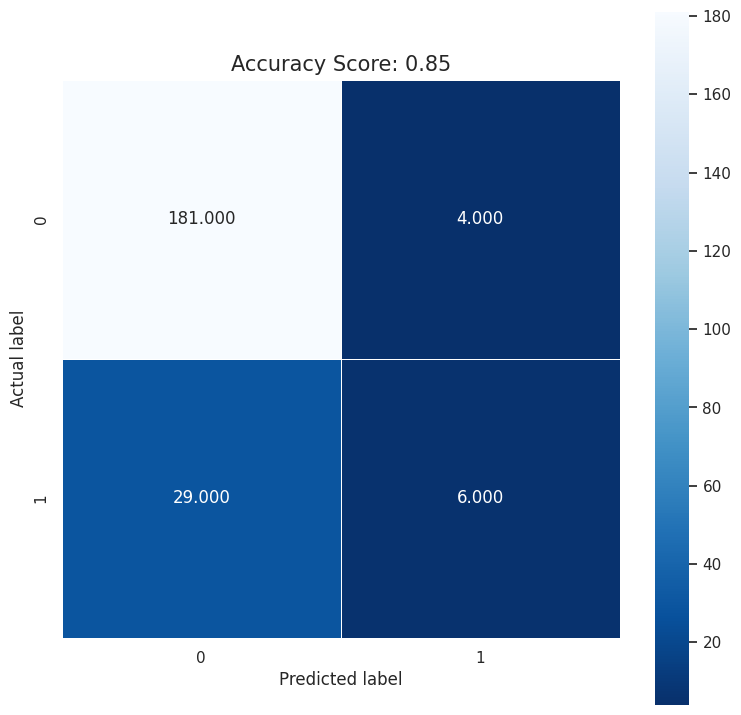

In [680]:
predictions = knn.predict(XvalT)
predictions_train = knn.predict(XtrainT)
cm = metrics.confusion_matrix(yvalT, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_val)
plt.title(all_sample_title, size = 15);

In [681]:
report = classification_report(yvalT, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       185
           1       0.60      0.17      0.27        35

    accuracy                           0.85       220
   macro avg       0.73      0.57      0.59       220
weighted avg       0.82      0.85      0.81       220



In [682]:
report = classification_report(ytrainT, predictions_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.81      0.40      0.54       166

    accuracy                           0.89      1029
   macro avg       0.85      0.69      0.74      1029
weighted avg       0.88      0.89      0.87      1029



## c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.

En base al análisis de sus reporte podemos considerar que al tener valores altos en el accuracy siendo un poco menor en la validación el modelo es equilibrado con un ligero overfitting sin embargo el modelo esta obteniendo buenos resultados en el conjunto de validación

## d) Interpreta el valor numérico de la “precision” de la clase positiva.

El modelo presenta una precisión del 0.81 una precisión buena por lo cual podemos decir que al haber 100 empleados 81 de ellos si van a salir mientras que el resto no lo van a hacer

## e) Interpreta el valor numérico del “recall” de la clase positiva.

El recall del modelo es de un 0.40 lo que significa que el tener 100 personas que se van a salir solo 40 van a salir y 60 de ellos van a permanecer en la empresa siendo este un Falso Negativo

## f) Compara los resultados con los del modelo de Regresión Logística y escribe tus conclusiones.

Podemos observar que el modelo de Regresión Logistica es mucho mas consistente al realizar multiples pruebas es posible observar que su desempeño en el conjunto de entranamiento y de validation es equilibrado mientras que podemos observar que este modelo tiene una mayor caida en accuracy entre el entranmiento y la validación

# PARTE 4: Balanceo de Clases

## 13) Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los valores de los hiperparámetros que consideres más adecuados para obtener un modelo no sobreentrenado.



In [683]:
delta = np.linspace(.05, .9, 16)   # generamos 8 valores entre 0.05 y 0.4 para generar los diferentes pesos de las clases.
tabla = list()
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
for w in delta:
  modelo = LogisticRegression(class_weight={0:w, 1:(1-w)}, max_iter=200)
  modelo.fit(XtrainT, ytrainT)
  yhat = modelo.predict(XvalT)

  acc = 100*modelo.score(XvalT,yvalT)

  cm = confusion_matrix(yvalT, yhat)

  tot = cm.sum()

  vn = 100*cm[0,0] / tot
  fp = 100*cm[0,1] / tot
  fn = 100*cm[1,0] / tot
  vp = 100*cm[1,1] / tot

  tabla.append([w, 1-w, acc, vn, fp, fn, vp])

print(tabulate(tabla,
               headers=["peso_clase_0","peso_clase_1", "Exactitud(%)", "VN(%)", "FP(%)", "FN(%)", "VP(%)"],
               tablefmt="github",
               floatfmt=".2f",
               colalign=("center","center","center",)))

|  peso_clase_0  |  peso_clase_1  |  Exactitud(%)  |   VN(%) |   FP(%) |   FN(%) |   VP(%) |
|----------------|----------------|----------------|---------|---------|---------|---------|
|      0.05      |      0.95      |     45.45      |   30.45 |   53.64 |    0.91 |   15.00 |
|      0.11      |      0.89      |     66.82      |   52.27 |   31.82 |    1.36 |   14.55 |
|      0.16      |      0.84      |     78.18      |   65.45 |   18.64 |    3.18 |   12.73 |
|      0.22      |      0.78      |     83.64      |   72.27 |   11.82 |    4.55 |   11.36 |
|      0.28      |      0.72      |     86.36      |   75.45 |    8.64 |    5.00 |   10.91 |
|      0.33      |      0.67      |     89.09      |   78.64 |    5.45 |    5.45 |   10.45 |
|      0.39      |      0.61      |     89.09      |   80.45 |    3.64 |    7.27 |    8.64 |
|      0.45      |      0.55      |     90.00      |   82.73 |    1.36 |    8.64 |    7.27 |
|      0.50      |      0.50      |     90.00      |   84.09 |    0.00

In [684]:
Log_reg_weight = LogisticRegression(max_iter=400, random_state=42,
                             class_weight={0:0.45, 1:0.55}, C=20.0
                             )
#Log_reg = LogisticRegression(max_iter=180, random_state=42, class_weight='balanced')
Log_reg_weight.fit(XtrainT,ytrainT)

LogisticRegression(C=20.0, class_weight={0: 0.45, 1: 0.55}, max_iter=400,
                   random_state=42)

### a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.

In [685]:
score_train = Log_reg_weight.score(XtrainT, ytrainT)
print("Accuracy:", score_train)

Accuracy: 0.8843537414965986


In [686]:
score_val = Log_reg_weight.score(XvalT, yvalT)
print("Accuracy:", score_val)

Accuracy: 0.9227272727272727


### b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

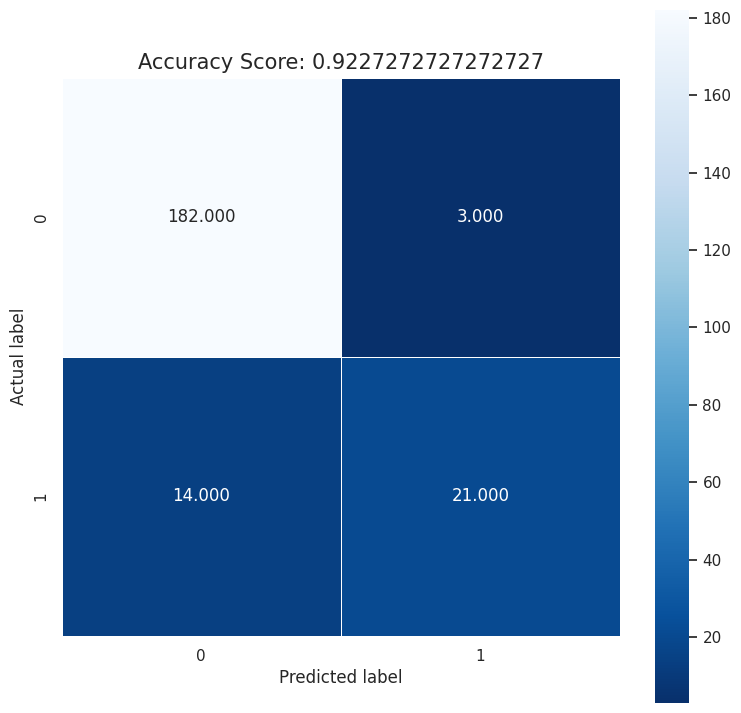

In [687]:
predictions = Log_reg_weight.predict(XvalT)
predictions_train = Log_reg_weight.predict(XtrainT)
cm = metrics.confusion_matrix(yvalT, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_val)
plt.title(all_sample_title, size = 15);

In [688]:
report = classification_report(ytrainT, predictions_train)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       863
           1       0.71      0.48      0.57       166

    accuracy                           0.88      1029
   macro avg       0.81      0.72      0.75      1029
weighted avg       0.87      0.88      0.87      1029



In [689]:
report = classification_report(yvalT, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       185
           1       0.88      0.60      0.71        35

    accuracy                           0.92       220
   macro avg       0.90      0.79      0.83       220
weighted avg       0.92      0.92      0.92       220



### c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.



De este modelo podemos considerarlo el mejor modelo haciendo un análisis de los pesos es posible observar la importancia que debemos darle a cada variable para lograr el mejor resultado

## 14) Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.

In [690]:
smote = SMOTE(random_state=42, sampling_strategy=0.3)

XtrainT_smote, ytrainT_smote = smote.fit_resample(XtrainT, ytrainT)
log_smote = LogisticRegression(max_iter=400, random_state=42)
log_smote.fit(XtrainT_smote,ytrainT_smote)

LogisticRegression(max_iter=400, random_state=42)

In [691]:
score_train = log_smote.score(XtrainT, ytrainT)
print("Accuracy:", score_train)

Accuracy: 0.8853255587949466


In [692]:
score_val = log_smote.score(XvalT, yvalT)
print("Accuracy:", score_val)

Accuracy: 0.9136363636363637


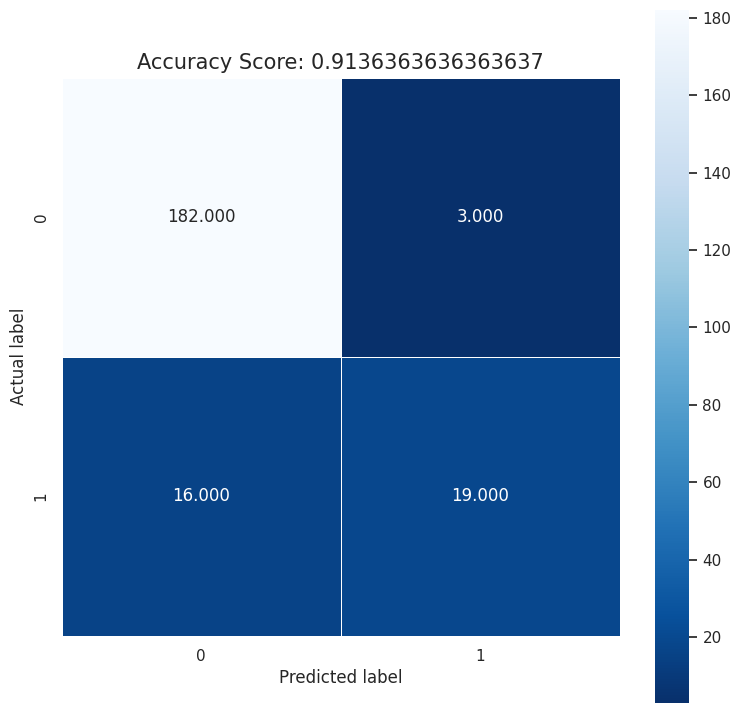

In [693]:
predictions = log_smote.predict(XvalT)
predictions_train = log_smote.predict(XtrainT)
cm = metrics.confusion_matrix(yvalT, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_val)
plt.title(all_sample_title, size = 15);

In [694]:
report = classification_report(ytrainT, predictions_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       863
           1       0.72      0.47      0.57       166

    accuracy                           0.89      1029
   macro avg       0.81      0.72      0.75      1029
weighted avg       0.88      0.89      0.88      1029



In [695]:
report = classification_report(yvalT, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       185
           1       0.86      0.54      0.67        35

    accuracy                           0.91       220
   macro avg       0.89      0.76      0.81       220
weighted avg       0.91      0.91      0.91       220



Podemos percatarnos lo consistente que es este modelo logrando una accuracy del 0.91 un valor alto colocando al modelo como uno de los mejores

### 15) Aplica alguno de los modelos combinados de sub y sobre entrenamiento y reporta los resultados del mejor modelo que hayas obtenido. Compáralo con los anteriores e incluye tus conclusiones.

In [696]:
from imblearn.combine import SMOTEENN
#sme = SMOTEENN(random_state=42, sampling_strategy='not majority')
sme = BorderlineSMOTE(sampling_strategy=0.2,
                      random_state=11)
X_res, y_res = sme.fit_resample(XtrainT, ytrainT)
log_smoteenn = LogisticRegression(max_iter=400, random_state=42, class_weight={0:0.45, 1:0.55})
log_smoteenn.fit(X_res,y_res)

LogisticRegression(class_weight={0: 0.45, 1: 0.55}, max_iter=400,
                   random_state=42)

In [697]:
score_train = log_smoteenn.score(XtrainT, ytrainT)
print("Accuracy train:", score_train)
score_val = log_smoteenn.score(XvalT, yvalT)
print("Accuracy validation:", score_val)

Accuracy train: 0.8862973760932945
Accuracy validation: 0.9181818181818182


Este modelo presenta un gran despeño tanto en el conjunto de entrenamiento como en el de validación.

# PARTE 5: La importancia de los factores

## 16) Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud de los coeficientes como métrica para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.

In [698]:
importance = Log_reg_weight.coef_[0]

for i,v in enumerate(importance):
 print('Factor: %0d, Coef-modelo: %.5f' % (i,v))



Factor: 0, Coef-modelo: -1.14472
Factor: 1, Coef-modelo: 0.75207
Factor: 2, Coef-modelo: -0.68156
Factor: 3, Coef-modelo: 1.04003
Factor: 4, Coef-modelo: 0.06858
Factor: 5, Coef-modelo: -0.36947
Factor: 6, Coef-modelo: 0.28370
Factor: 7, Coef-modelo: 0.14940
Factor: 8, Coef-modelo: -0.53513
Factor: 9, Coef-modelo: -0.18512
Factor: 10, Coef-modelo: -0.37390
Factor: 11, Coef-modelo: 0.46867
Factor: 12, Coef-modelo: 0.04234
Factor: 13, Coef-modelo: 1.51801
Factor: 14, Coef-modelo: 1.82979
Factor: 15, Coef-modelo: -0.27118
Factor: 16, Coef-modelo: 0.11327
Factor: 17, Coef-modelo: -0.19622
Factor: 18, Coef-modelo: -0.22927
Factor: 19, Coef-modelo: -1.34626
Factor: 20, Coef-modelo: -0.74165
Factor: 21, Coef-modelo: -0.36036
Factor: 22, Coef-modelo: 3.05673
Factor: 23, Coef-modelo: -2.14344
Factor: 24, Coef-modelo: 2.44349
Factor: 25, Coef-modelo: -2.62047
Factor: 26, Coef-modelo: -0.14398
Factor: 27, Coef-modelo: 0.06072
Factor: 28, Coef-modelo: -0.76530
Factor: 29, Coef-modelo: -0.73237
Fac

### a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

<Axes: xlabel='Coefficient', ylabel='Feature'>

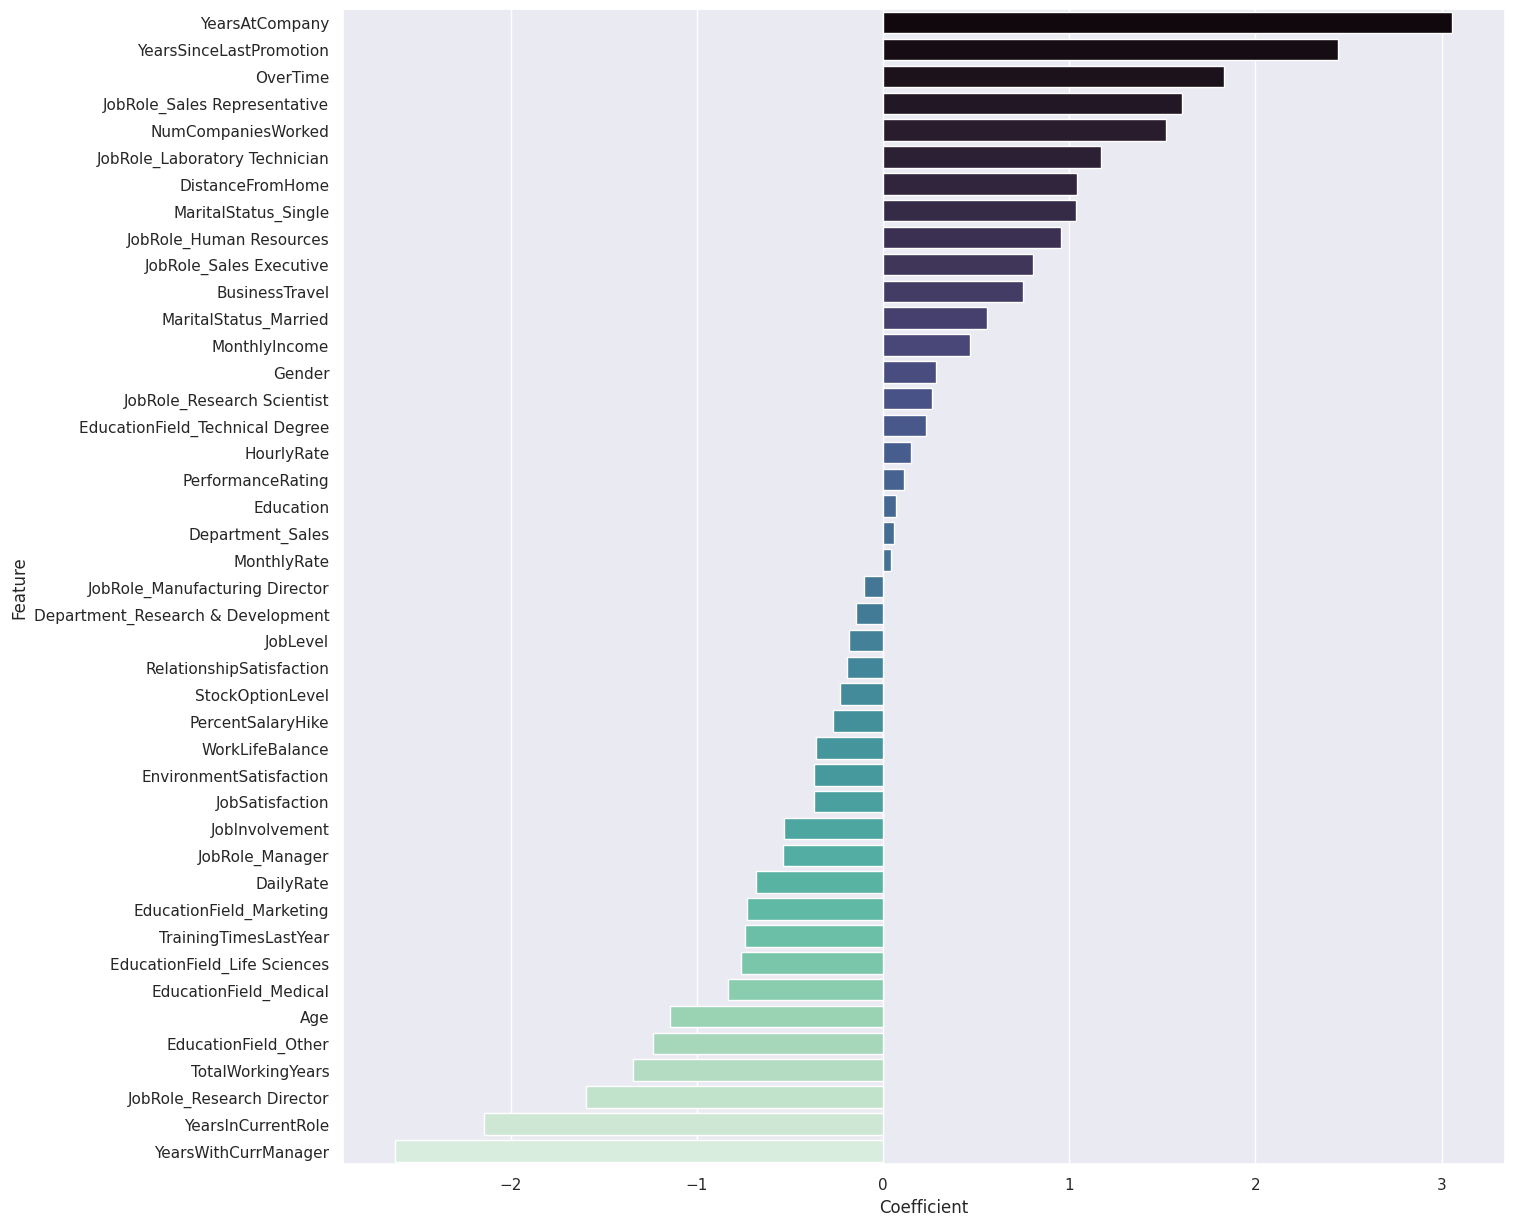

In [699]:
coeficientes = pd.DataFrame({'Feature': XtrainT.columns, 'Coefficient': importance})

# Ordenar los coeficientes por magnitud (absoluta) para visualizar mejor los más importantes
coef_df = coeficientes.sort_values(by='Coefficient',ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(data=coef_df, y='Feature', hue='Feature', x='Coefficient', palette='mako', legend=False)


### b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?

Podemos observar en base a esta gráfica tres de los factores más decisivos para decidir abandonar la empresa son

*   YearAtCompany
*   YearSinceLastPromotion
*   OverTime

Estas variables en el contexto real tienen mucho sentido puesto que tanto por el tiempo en la compañia ya sea por un cambio de aires o por motivos de edad deciden abandonar la empresa

El no recibir un incentivo o un cambio en el puesto para algunos empleados puede resultar en estancamiento profesional por lo que deciden abandonar

El sobretiempo oseas las horas extra juega como un papel clave ya que si requieren dedicar mas horas al trabajo resulta mas desgastante

### c) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

Los factores negativos son los que menos determinan la decision de abandonar donde estas relacionados con mantener a un mismo manager, mantenerse en un mismo rol y tener un puesto de directivo representan los factores de conservción de empleados

## 17) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN, aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.

In [700]:
resultados = permutation_importance(Log_reg_weight, XvalT, yvalT, scoring='f1_weighted')
importance = resultados.importances_mean

for i,v in enumerate(importance):
 print('Factor: %0d, Coef-modelo: %.5f' % (i,v))

Factor: 0, Coef-modelo: 0.03696
Factor: 1, Coef-modelo: 0.02380
Factor: 2, Coef-modelo: 0.01158
Factor: 3, Coef-modelo: 0.03179
Factor: 4, Coef-modelo: 0.00931
Factor: 5, Coef-modelo: 0.03267
Factor: 6, Coef-modelo: 0.00649
Factor: 7, Coef-modelo: 0.00336
Factor: 8, Coef-modelo: 0.02013
Factor: 9, Coef-modelo: 0.02159
Factor: 10, Coef-modelo: 0.01862
Factor: 11, Coef-modelo: 0.00225
Factor: 12, Coef-modelo: 0.00000
Factor: 13, Coef-modelo: 0.02672
Factor: 14, Coef-modelo: 0.08683
Factor: 15, Coef-modelo: 0.00505
Factor: 16, Coef-modelo: 0.00084
Factor: 17, Coef-modelo: 0.02743
Factor: 18, Coef-modelo: 0.01895
Factor: 19, Coef-modelo: 0.02859
Factor: 20, Coef-modelo: 0.01094
Factor: 21, Coef-modelo: 0.01820
Factor: 22, Coef-modelo: 0.02593
Factor: 23, Coef-modelo: 0.04700
Factor: 24, Coef-modelo: 0.02982
Factor: 25, Coef-modelo: 0.05459
Factor: 26, Coef-modelo: 0.00672
Factor: 27, Coef-modelo: 0.00084
Factor: 28, Coef-modelo: 0.03217
Factor: 29, Coef-modelo: 0.01385
Factor: 30, Coef-mod

### a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).

<Axes: xlabel='Coefficient', ylabel='Feature'>

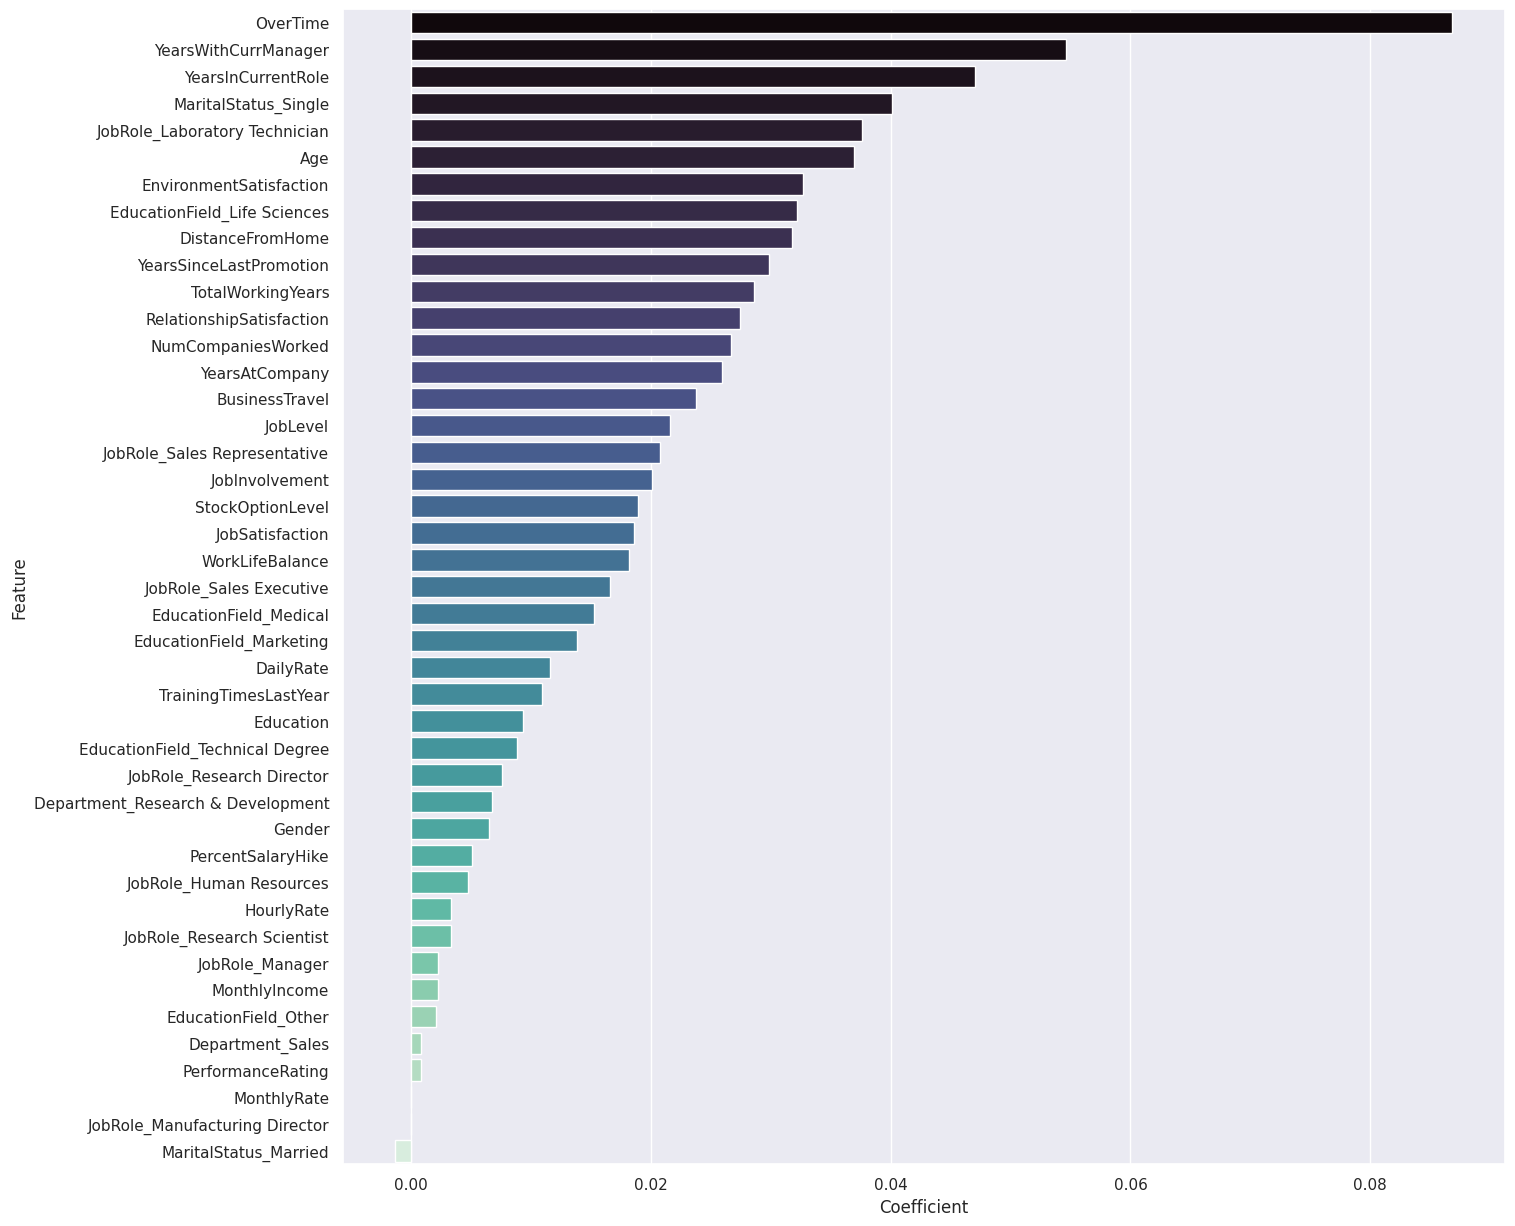

In [701]:
coeficientes = pd.DataFrame({'Feature': XtrainT.columns, 'Coefficient': importance})

# Ordenar los coeficientes por magnitud (absoluta) para visualizar mejor los más importantes
coef_df = coeficientes.sort_values(by='Coefficient',ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(data=coef_df, y='Feature', hue='Feature', x='Coefficient', palette='mako', legend=False)


### b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)

De acuerdo a este análisis es posible observar que los factores que más influyen en el abandono son:

* OverTime
* YearsWithCurManager
* YearsinCurRole
* Marital Status
* Age

Estas son las características mas relevantes en base al análisis F1 score dando un mayor peso a variables importantes logrando un mejor balanceo entre el peso que tienen cada uno de los diferentes factores

### c) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

Podemos considerar que los factores relevantes en la parte de retención de empleados serían los de menor peso en abandono

* JobRoleResearch: Balancea bien este parametro considerando que es el area donde mas personas trabajan
* PercentSalaryHike: La empresa sube los salarios de acuerdo a como incementa las necesidad a traves de los años
* Monthly Income: Este factor empieza a crecer en relevancia sin embargo aun es bajo por lo que podríamos considerar que para la mayoría de involucrados los sueldos son buenos.

### d) Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.

Considero que el método de coeficientes otorga una mejor perspectiva acerca de los factores influyentes ya que incluye escalas negativas a las variables que aportan a visualizar que gracias a ellos se retienen a los empleados además que los factores que considera son más apegados a un contexto real.

## 18) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y elkNN y de los factores de mayor impacto que encontraste en el inciso anterior, utiliza laclase SelectFromModel de sklearn para reducir la cantidad de factores del problema y volver a entrenar el modelo con los datos de entrenamiento y validación, de manera que el desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida previamente con todos los factores. Recuerda evitar el filtrado de información del conjunto de entrenamiento a los conjuntos de validación y de prueba

In [702]:
max_f = 15

# Indicamos el modelo que se usará para evaluar la importancia de los factores
# y la cantidad de ellos que se desean extraer:
fs = SelectFromModel(estimator=LogisticRegression(max_iter=400, random_state=42,
                             class_weight={0:0.45, 1:0.55}, C=20.0), max_features=max_f)
# ajustamos con  los datos de entrenamiento para determinar cuáles se consideran los más relevantes:
fs.fit(XtrainT, ytrainT)
# y ahora obtenemos los factores
factor_select = fs.get_support()



In [703]:
Xtrain_fs = pd.DataFrame(XtrainT)[pd.DataFrame(XtrainT).columns[factor_select]]
Xval_fs = pd.DataFrame(XvalT)[pd.DataFrame(XvalT).columns[factor_select]]
Xtest_fs = pd.DataFrame(XtestT)[pd.DataFrame(XtestT).columns[factor_select]]
Xtrain_fs.head()

,Age,DistanceFromHome,NumCompaniesWorked,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationField_Other,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Single
1293,0.595238,0.285714,0.444444,0,0.175,0.075,0.117647,0.066667,0.117647,0,0,0,0,0,1
774,0.880952,0.035714,0.777778,0,0.775,0.225,0.411765,0.400000,0.117647,0,0,0,0,0,1
580,0.404762,0.250000,0.111111,0,0.075,0.075,0.117647,0.000000,0.117647,0,0,0,0,1,0
591,0.357143,0.535714,0.555556,0,0.150,0.075,0.117647,0.000000,0.117647,0,0,0,0,0,1
1165,0.619048,0.000000,0.444444,1,0.350,0.250,0.411765,0.000000,0.117647,0,1,0,0,0,0


In [704]:
Log_reg_weight = LogisticRegression(max_iter=400, random_state=42,
                             class_weight={0:0.45, 1:0.55}, C=20.0
                             )
#Log_reg = LogisticRegression(max_iter=180, random_state=42, class_weight='balanced')
Log_reg_weight.fit(Xtrain_fs,ytrainT)

score_train = Log_reg_weight.score(Xtrain_fs, ytrainT)
print("Accuracy train:", score_train)
score_val_weight = Log_reg_weight.score(Xval_fs, yvalT)
print("Accuracy:", score_val_weight)

Accuracy train: 0.8600583090379009
Accuracy: 0.8681818181818182


### a) ¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.

In [705]:
Column_orig = XtrainT.shape[1]
Column_fs = Xtrain_fs.shape[1]

porcentage = ((Column_orig-Column_fs)/Column_orig)*100.0

print('Factores Iniciales:',Column_orig)
print('Factores despuesfs:',Column_fs)
print("Porcentage de reduccion:",round(porcentage,3))

Factores Iniciales: 43
Factores despuesfs: 15
Porcentage de reduccion: 65.116


### b) Despliega la matriz de confusión y el reporte dado por la función classification_report().

Text(0.5, 1.0, 'Accuracy Score: 0.8681818181818182')

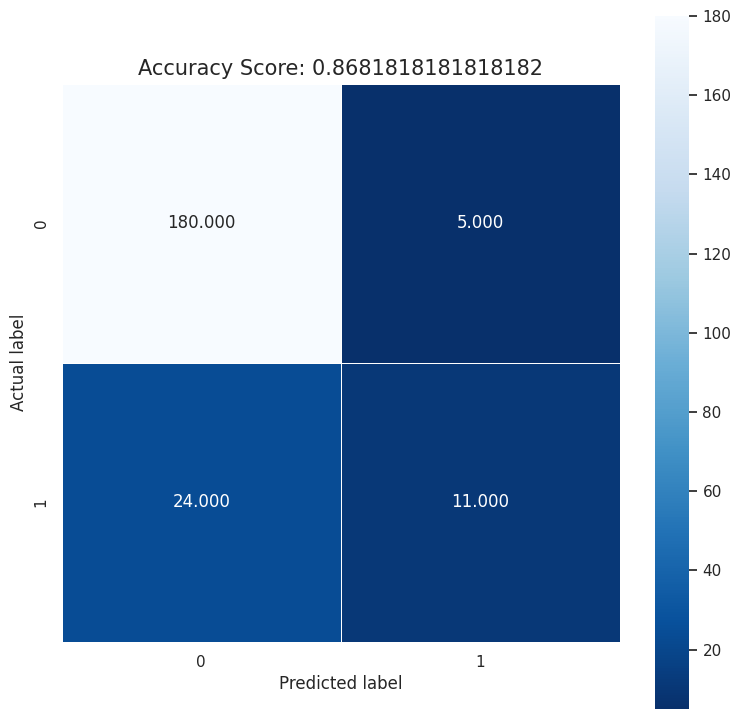

In [706]:
predictions = Log_reg_weight.predict(Xval_fs)
predictions_train = Log_reg_weight.predict(Xtrain_fs)
cm = metrics.confusion_matrix(yvalT, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_val_weight)
plt.title(all_sample_title, size = 15)

In [707]:
report = classification_report(yvalT, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       185
           1       0.69      0.31      0.43        35

    accuracy                           0.87       220
   macro avg       0.78      0.64      0.68       220
weighted avg       0.85      0.87      0.85       220



# PARTE 6: Modelo final y conclusiones

## 19) Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal a partir de los datos históricos iniciales.

### a) Forma un nuevo conjunto de Entrenamiento con los mejores conjuntos de entrenamiento y validación que hayas obtenido hasta ahora.

In [708]:
XtrainFull = pd.concat([XtrainT, XvalT], axis=0)
ytrainFull = np.concatenate([ytrainT, yvalT], axis=0)

### b) Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor modelo.

Haremos uso del modelo de regresión logistica con class_weights puesto que en las pruebas fue el que mejor comportamiento mostró dando un accuracy de 0.92 además de que se ejecutaron diferentes tuneos para hallar los pesos de las clases 0 y 1

### c) Entrena el modelo con el nuevo conjunto de entrenamiento aumentado y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo. Para ello:

In [709]:
Log_reg_weight = LogisticRegression(max_iter=400, random_state=42,
                             class_weight={0:0.45, 1:0.55}, C=20.0
                             )
#Log_reg = LogisticRegression(max_iter=180, random_state=42, class_weight='balanced')
Log_reg_weight.fit(XtrainFull,ytrainFull)

LogisticRegression(C=20.0, class_weight={0: 0.45, 1: 0.55}, max_iter=400,
                   random_state=42)

#### i. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.

In [710]:
score_train = Log_reg_weight.score(XtrainFull, ytrainFull)
print("Accuracy:", score_train)

score_val = Log_reg_weight.score(XtestT, ytestT)
print("Accuracy:", score_val)

Accuracy: 0.8863090472377902
Accuracy: 0.9049773755656109


#### ii. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.

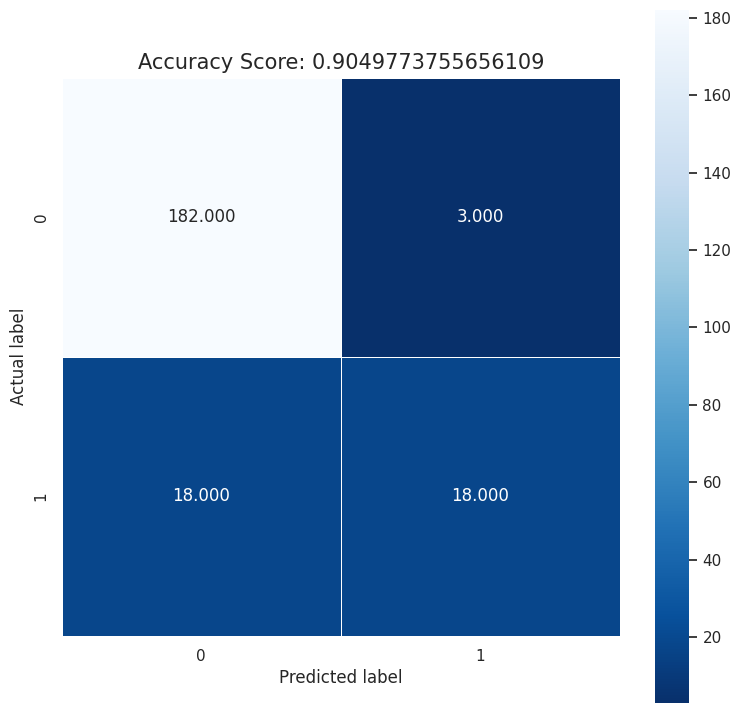

In [711]:
predictions = Log_reg_weight.predict(XtestT)
predictions_train = Log_reg_weight.predict(XtrainFull)
cm = metrics.confusion_matrix(ytestT, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_val)
plt.title(all_sample_title, size = 15);

#### iii. Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.

In [712]:
report = classification_report(ytrainFull, predictions_train)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1048
           1       0.71      0.49      0.58       201

    accuracy                           0.89      1249
   macro avg       0.81      0.73      0.76      1249
weighted avg       0.88      0.89      0.88      1249



In [713]:
report = classification_report(ytestT, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       185
           1       0.86      0.50      0.63        36

    accuracy                           0.90       221
   macro avg       0.88      0.74      0.79       221
weighted avg       0.90      0.90      0.89       221



En base a las métricas dadas por el reporte de clasificación podemos notar lo siguiente sobre la precisión, recall y f1-score

* Precision: Evaluando el conjunto de test obtenemos una precisión final del 0.86 en la clase positiva lo que se define como la veracidad de la afirmación es decir se provee un grupo con 100 personas y el modelo determina que 86 de ellos si abandonan y 14 son catalogados como que no abandonan siendo este un FP.

* Sensibilidad(Recall): Esta es la tasa de predicción correctas el proveerse un grupo de 100 personas que se sabe que abandonan el modelo considera que de 100 personas 50 y 50 empleados serán catalogados como que abandonan o que se quedan

* f1-score: Hacemos uso de esta métrica justamente cuando se tienen clases desbalanceadas la puntuación es de 0.63 lo que nos puede indicar un equilibrio entre la precisión y el recall, por lo que se puede decir que es preciso para cuando un empleado abandona y cuando no lo hace, Al considerar los FP y FN da una visión más equilibrada.